# Student Dropout Prediction Project

## I. Business Problem  

### **Context:**  
Student retention is one of the most critical challenges for higher education institutions. When students drop out before graduation, it not only results in revenue loss but also negatively impacts institutional reputation and key performance indicators. Retaining a student is far less costly than acquiring a new one. Early identification of at-risk students is therefore essential to implement timely interventions and improve retention rates.  

### **Problem Statement:**  
- **Student Perspective:** Many students face academic, financial, or personal challenges that can lead to dropping out. Identifying these students early allows the institution to provide the right support to keep them on track.  
- **Institutional Perspective:** Universities need a reliable predictive model to classify students as either *Dropout* or *Non-Dropout* to design proactive strategies that reduce attrition and improve graduation rates.  

### **Stakeholders:**  
- **University Management:** Uses dropout predictions to design retention policies and allocate resources effectively.  
- **Academic Advisors & Student Support Teams:** Provides targeted interventions and personalized support for at-risk students.  
- **Financial Department:** Can use model insights to link payment and scholarship data with dropout risk for early action.  
- **Data Science & Analytics Team:** Develops Machine Learning models to identify patterns and risk factors leading to dropout.  

### **Goals:**  
1. Build a Machine Learning model to accurately classify students as *Dropout* or *Non-Dropout*.  
2. Identify the most significant socio-demographic, academic, and economic factors contributing to dropout.  
3. Provide actionable insights to help universities create early intervention programs.  
4. Reduce dropout rates and increase overall student retention and graduation rates.  

### **Business Impact:**  
With a tuned Logistic Regression model achieving **~0.95 recall**, the institution can identify the vast majority of students at risk of dropping out.  
- **Financial:** Early interventions can significantly reduce tuition revenue loss.  
- **Operational:** Allows proactive resource allocation for academic support and financial aid.  
- **Reputation:** Improves graduation rates and enhances the institution's standing.  


In [1]:
#Import the usual library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv', sep = ';')

## II. Data Understanding & Preprocessing

The dataset used in this project was obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success).  
It contains academic, demographic, and socio-economic information of students, with the objective of predicting dropout risk and academic success.


In [3]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

| Variable Name                      | Type        | Demographic     | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| ---------------------------------- | ----------- | --------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Marital Status**                 | Integer     | Marital Status  | Student’s marital status: 1 – Single, 2 – Married, 3 – Widower, 4 – Divorced, 5 – Facto Union, 6 – Legally Separated                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| **Application mode**               | Integer     |                 | Admission pathway: 1 - 1st phase general contingent, 2 - Ordinance No. 612/93, 5 - 1st phase special contingent (Azores Island), 7 - Holders of other higher courses, 10 - Ordinance No. 854-B/99, 15 - International student (bachelor), 16 - 1st phase special contingent (Madeira Island), 17 - 2nd phase general contingent, 18 - 3rd phase general contingent, 26 - Ordinance No. 533-A/99 item b2 (Different Plan), 27 - Ordinance No. 533-A/99 item b3 (Other Institution), 39 - Over 23 years old, 42 - Transfer, 43 - Change of course, 44 - Technological specialization diploma holders, 51 - Change of institution/course, 53 - Short cycle diploma holders, 57 - Change of institution/course (International) |
| **Application order**              | Integer     |                 | Order of course application (0 = first choice, 9 = last choice)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| **Course**                         | Integer     |                 | Student’s enrolled course: 33 - Biofuel Production Technologies, 171 - Animation and Multimedia Design, 8014 - Social Service (evening), 9003 - Agronomy, 9070 - Communication Design, 9085 - Veterinary Nursing, 9119 - Informatics Engineering, 9130 - Equinculture, 9147 - Management, 9238 - Social Service, 9254 - Tourism, 9500 - Nursing, 9556 - Oral Hygiene, 9670 - Advertising and Marketing Management, 9773 - Journalism and Communication, 9853 - Basic Education, 9991 - Management (evening)                                                                                                                                                                                                                |
| **Daytime/evening attendance**     | Integer     |                 | Class schedule: 1 – Daytime, 0 – Evening                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| **Previous qualification**         | Integer     | Education Level | Student’s previous education level: 1 - Secondary education, 2 - Higher education - bachelor's degree, 3 - Higher education - degree, 4 - Higher education - master's, 5 - Higher education - doctorate, 6 - Frequency of higher education, 9 - 12th year not completed, 10 - 11th year not completed, 12 - Other 11th year, 14 - 10th year, 15 - 10th year not completed, 19 - Basic education 3rd cycle, 38 - Basic education 2nd cycle, 39 - Technological specialization course, 40 - Higher education degree (1st cycle), 42 - Professional higher technical course, 43 - Higher education master (2nd cycle)                                                                                                         |
| **Previous qualification (grade)** | Continuous  |                 | Grade of previous qualification (0–200)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| **Nationality**                    | Integer     | Nationality     | Encoded nationality: 1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova; 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian                                                                                                                                                                                                                                                                                                                                                                             |
| **Mother's qualification**         | Integer     | Education Level | Mother’s highest education level (coded categories including Secondary, Higher Education, Technical courses, Basic education, Unknown, Can't read/write, etc.)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| **Father's qualification**         | Integer     | Education Level | Father’s highest education level (coded categories similar to mother's, with additional complementary and technical courses)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| **Mother's occupation**            | Integer     | Occupation      | Encoded mother’s occupation: Student, Legislators/Directors, Specialists, Technicians, Administrative staff, Service workers, Farmers, Skilled workers, Machine operators, Unskilled workers, Armed forces, etc.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| **Father's occupation**            | Integer     | Occupation      | Encoded father’s occupation: Student, Legislators/Directors, Specialists, Technicians, Administrative staff, Service workers, Farmers, Skilled workers, Machine operators, Unskilled workers, Armed forces, etc.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| **Admission grade**                | Continuous  |                 | Admission grade on entry exam (0–200)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| **Displaced**                      | Integer     |                 | Whether the student is displaced: 1 – Yes, 0 – No                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| **Educational special needs**      | Integer     |                 | Whether the student has special educational needs: 1 – Yes, 0 – No                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| **Debtor**                         | Integer     |                 | Whether the student is in debt: 1 – Yes, 0 – No                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| **Tuition fees up to date**        | Integer     |                 | Whether tuition fees are paid: 1 – Yes, 0 – No                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| **Gender**                         | Integer     | Gender          | Student’s gender: 1 – Male, 0 – Female                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| **Scholarship holder**             | Integer     |                 | Whether the student has a scholarship: 1 – Yes, 0 – No                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| **Age at enrollment**              | Integer     | Age             | Age of the student at enrollment                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| **Target**                         | Categorical |                 | Student outcome category: *Dropout*, *Enrolled*, *Graduate*                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |


In [5]:
df.rename(columns={'Daytime/evening attendance\t': 'Daytime/evening attendance'}, inplace=True)

In [6]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


### Categorical Mapping

In [7]:
# Marital Status
marital_status_map = {
    1: 'single', 2: 'married', 3: 'widower', 4: 'divorced',
    5: 'facto union', 6: 'legally separated'
}

# Application Mode
application_mode_map = {
    1: '1st phase - general contingent',
    2: 'Ordinance No. 612/93',
    5: '1st phase - special contingent (Azores Island)',
    7: 'Holders of other higher courses',
    10: 'Ordinance No. 854-B/99',
    15: 'International student (bachelor)',
    16: '1st phase - special contingent (Madeira Island)',
    17: '2nd phase - general contingent',
    18: '3rd phase - general contingent',
    26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
    27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    39: 'Over 23 years old',
    42: 'Transfer',
    43: 'Change of course',
    44: 'Technological specialization diploma holders',
    51: 'Change of institution/course',
    53: 'Short cycle diploma holders',
    57: 'Change of institution/course (International)'
}

# Course
course_map = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

# Daytime/Evening
attendance_map = {1: 'daytime', 0: 'evening'}

# Previous Qualification
prev_qual_map = {
    1: 'Secondary education', 2: "Higher education - bachelor's degree",
    3: 'Higher education - degree', 4: "Higher education - master's",
    5: 'Higher education - doctorate', 6: 'Frequency of higher education',
    9: '12th year of schooling - not completed', 10: '11th year of schooling - not completed',
    12: 'Other - 11th year of schooling', 14: '10th year of schooling',
    15: '10th year of schooling - not completed',
    19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
    38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    42: 'Professional higher technical course',
    43: 'Higher education - master (2nd cycle)'
}

# Nationality
nationality_map = {
    1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian',
    13: 'Dutch', 14: 'English', 17: 'Lithuanian', 21: 'Angolan',
    22: 'Cape Verdean', 24: 'Guinean', 25: 'Mozambican',
    26: 'Santomean', 32: 'Turkish', 41: 'Brazilian', 62: 'Romanian',
    100: 'Moldova', 101: 'Mexican', 103: 'Ukrainian', 105: 'Russian',
    108: 'Cuban', 109: 'Colombian'
}

# Mother's/Father's Qualification
mother_qual_map = father_qual_map = {
    1: 'Secondary Education - 12th Year', 2: "Higher Education - Bachelor's",
    3: 'Higher Education - Degree', 4: "Higher Education - Master",
    5: 'Higher Education - Doctorate', 6: 'Frequency of Higher Education',
    9: '12th Year - Not Completed', 10: '11th Year - Not Completed',
    11: '7th Year (Old)', 12: 'Other - 11th Year', 14: '10th Year',
    18: 'General commerce course', 19: 'Basic Education 3rd Cycle',
    22: 'Technical-professional course', 26: '7th year of schooling',
    27: '2nd cycle high school', 29: '9th Year - Not Completed',
    30: '8th year of schooling', 34: 'Unknown', 35: "Can't read or write",
    36: 'Can read (no 4th year)', 37: 'Basic education 1st cycle',
    38: 'Basic Education 2nd Cycle', 39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    41: 'Specialized higher studies', 42: 'Professional higher technical course',
    43: 'Higher Education - Master (2nd cycle)',
    44: 'Higher Education - Doctorate (3rd cycle)'
}

# Mother's Occupation
mother_occ_map = {
    0: 'Student',
    1: 'Legislative/Executive/Directors',
    2: 'Specialists in Intellectual and Scientific Activities',
    3: 'Intermediate Level Technicians and Professions',
    4: 'Administrative staff',
    5: 'Personal Services, Security and Safety Workers and Sellers',
    6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
    7: 'Skilled Workers in Industry, Construction and Craftsmen',
    8: 'Installation and Machine Operators and Assembly Workers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    90: 'Other Situation',
    99: '(blank)',
    122: 'Health professionals',
    123: 'Teachers',
    125: 'Specialists in information and communication technologies (ICT)',
    131: 'Intermediate level science and engineering technicians and professions',
    132: 'Technicians and professionals, of intermediate level of health',
    134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
    141: 'Office workers, secretaries in general and data processing operators',
    143: 'Data, accounting, statistical, financial services and registry-related operators',
    144: 'Other administrative support staff',
    151: 'Personal service workers',
    152: 'Sellers',
    153: 'Personal care workers and the like',
    171: 'Skilled construction workers and the like, except electricians',
    173: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like',
    175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
    191: 'Cleaning workers',
    192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
    193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
    194: 'Meal preparation assistants'
}

# Father's Occupation
father_occ_map = {
    0: 'Student',
    1: 'Legislative/Executive/Directors',
    2: 'Specialists in Intellectual and Scientific Activities',
    3: 'Intermediate Level Technicians and Professions',
    4: 'Administrative staff',
    5: 'Personal Services, Security and Safety Workers and Sellers',
    6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
    7: 'Skilled Workers in Industry, Construction and Craftsmen',
    8: 'Installation and Machine Operators and Assembly Workers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    90: 'Other Situation',
    99: '(blank)',
    101: 'Armed Forces Officers',
    102: 'Armed Forces Sergeants',
    103: 'Other Armed Forces personnel',
    112: 'Directors of administrative and commercial services',
    114: 'Hotel, catering, trade and other services directors',
    121: 'Specialists in the physical sciences, mathematics, engineering and related techniques',
    122: 'Health professionals',
    123: 'Teachers',
    124: 'Specialists in finance, accounting, administrative organization, public and commercial relations',
    131: 'Intermediate level science and engineering technicians and professions',
    132: 'Technicians and professionals, of intermediate level of health',
    134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
    135: 'Information and communication technology technicians',
    141: 'Office workers, secretaries in general and data processing operators',
    143: 'Data, accounting, statistical, financial services and registry-related operators',
    144: 'Other administrative support staff',
    151: 'Personal service workers',
    152: 'Sellers',
    153: 'Personal care workers and the like',
    154: 'Protection and security services personnel',
    161: 'Market-oriented farmers and skilled agricultural and animal production workers',
    163: 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence',
    171: 'Skilled construction workers and the like, except electricians',
    172: 'Skilled workers in metallurgy, metalworking and similar',
    174: 'Skilled workers in electricity and electronics',
    175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
    181: 'Fixed plant and machine operators',
    182: 'Assembly workers',
    183: 'Vehicle drivers and mobile equipment operators',
    192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
    193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
    194: 'Meal preparation assistants',
    195: 'Street vendors (except food) and street service providers'
}

# Gender
gender_map = {1: 'male', 0: 'female'}

# Target
target_map = {
    'Dropout': 'Dropout',
    'Enrolled': 'Non-Dropout',
    'Graduate': 'Non-Dropout'
}

# Apply Mapping
df['Marital status'] = df['Marital status'].map(marital_status_map)
df['Application mode'] = df['Application mode'].map(application_mode_map)
df['Course'] = df['Course'].map(course_map)
df['Daytime/evening attendance'] = df['Daytime/evening attendance'].map(attendance_map)
df['Previous qualification'] = df['Previous qualification'].map(prev_qual_map)
df['Nacionality'] = df['Nacionality'].map(nationality_map)
df["Mother's qualification"] = df["Mother's qualification"].map(mother_qual_map)
df["Father's qualification"] = df["Father's qualification"].map(father_qual_map)
df["Mother's occupation"] = df["Mother's occupation"].map(mother_occ_map)
df["Father's occupation"] = df["Father's occupation"].map(father_occ_map)
df['Gender'] = df['Gender'].map(gender_map)
df['Target'] = df['Target'].map(target_map)

In [8]:
# Save new df
df.to_csv('dropout_students.csv')

### Re-Understanding Data

| Column                              | Data Type   | Description                                                                                     | Unique Values / Categories |
|------------------------------------|-------------|-------------------------------------------------------------------------------------------------|----------------------------|
| Marital status                     | Integer     | Student’s marital status                                                                        | 1=Single, 2=Married, 3=Widower, 4=Divorced, 5=Facto union, 6=Legally separated |
| Application mode                   | Integer     | Application admission mode                                                                      | 1=1st phase - general contingent, 17=2nd phase - general contingent, etc. |
| Application order                  | Integer     | Priority order of the course choice (0 = first choice, 9 = last choice)                         | 0–9 |
| Course                             | Integer     | Code of the enrolled course                                                                     | e.g., 171=Animation and Multimedia Design, 9070=Communication Design, etc. |
| Daytime/evening attendance         | Integer     | Class attendance mode                                                                           | 1=Daytime, 0=Evening |
| Previous qualification             | Integer     | Previous education level                                                                        | 1=Secondary Education, 2=Higher Education - Bachelor's, etc. |
| Previous qualification (grade)     | Continuous  | Average grade of previous qualification (0–200)                                                 | Numeric |
| Nacionality                        | Integer     | Student’s nationality                                                                           | 1=Portuguese, 2=German, 6=Spanish, etc. |
| Mother's qualification             | Integer     | Mother’s education level                                                                        | 1=Secondary Education - 12th Year, 3=Higher Education - Degree, etc. |
| Father's qualification             | Integer     | Father’s education level                                                                        | 1=Secondary Education - 12th Year, 3=Higher Education - Degree, etc. |
| Mother's occupation                | Integer     | Mother’s occupation                                                                             | 0=Student, 1=Directors/Managers, 2=Specialists, etc. |
| Father's occupation                | Integer     | Father’s occupation                                                                             | 0=Student, 1=Directors/Managers, 2=Specialists, etc. |
| Admission grade                    | Continuous  | Admission grade to the university (0–200)                                                       | Numeric |
| Displaced                          | Integer     | Whether the student is from a different city                                                    | 1=Yes, 0=No |
| Educational special needs          | Integer     | Whether the student has special educational needs                                               | 1=Yes, 0=No |
| Debtor                             | Integer     | Whether the student has outstanding tuition debts                                               | 1=Yes, 0=No |
| Tuition fees up to date            | Integer     | Whether tuition fees are up to date                                                             | 1=Yes, 0=No |
| Gender                             | Integer     | Student’s gender                                                                                | 1=Male, 0=Female |
| Scholarship holder                 | Integer     | Whether the student is a scholarship holder                                                     | 1=Yes, 0=No |
| Age at enrollment                  | Integer     | Student’s age at enrollment                                                                     | Numeric |
| International                      | Integer     | Whether the student is an international student                                                 | 1=Yes, 0=No |
| Curricular units 1st sem (credited)| Integer     | Number of credited curricular units in the 1st semester                                         | Numeric |
| Curricular units 1st sem (enrolled)| Integer     | Number of enrolled curricular units in the 1st semester                                         | Numeric |
| Curricular units 1st sem (evaluations)| Integer  | Number of evaluations taken in the 1st semester                                                 | Numeric |
| Curricular units 1st sem (approved)| Integer     | Number of approved curricular units in the 1st semester                                         | Numeric |
| Curricular units 1st sem (grade)   | Continuous  | Average grade in the 1st semester (0–20)                                                        | Numeric |
| Curricular units 1st sem (without evaluations)| Integer | Number of 1st semester curricular units without evaluations                                     | Numeric |
| Curricular units 2nd sem (credited)| Integer     | Number of credited curricular units in the 2nd semester                                         | Numeric |
| Curricular units 2nd sem (enrolled)| Integer     | Number of enrolled curricular units in the 2nd semester                                         | Numeric |
| Curricular units 2nd sem (evaluations)| Integer  | Number of evaluations taken in the 2nd semester                                                 | Numeric |
| Curricular units 2nd sem (approved)| Integer     | Number of approved curricular units in the 2nd semester                                         | Numeric |
| Curricular units 2nd sem (grade)   | Continuous  | Average grade in the 2nd semester (0–20)                                                        | Numeric |
| Curricular units 2nd sem (without evaluations)| Integer | Number of 2nd semester curricular units without evaluations                                     | Numeric |
| Unemployment rate                  | Continuous  | National unemployment rate (%) at the time of enrollment                                        | Numeric |
| Inflation rate                     | Continuous  | National inflation rate (%) at the time of enrollment                                           | Numeric |
| GDP                                | Continuous  | National Gross Domestic Product (GDP) at the time of enrollment                                 | Numeric |
| Target                             | Categorical | Final student status (classification target)                                                    | Dropout, Non-Dropout |


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   object 
 1   Application mode                                4424 non-null   object 
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   object 
 4   Daytime/evening attendance                      4424 non-null   object 
 5   Previous qualification                          4424 non-null   object 
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   object 
 8   Mother's qualification                          4424 non-null   object 
 9   Father's qualification                   

In [10]:
# Check duplicated data
df.duplicated().sum()

0

In [11]:
# Check null data
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            5
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

### Univariate

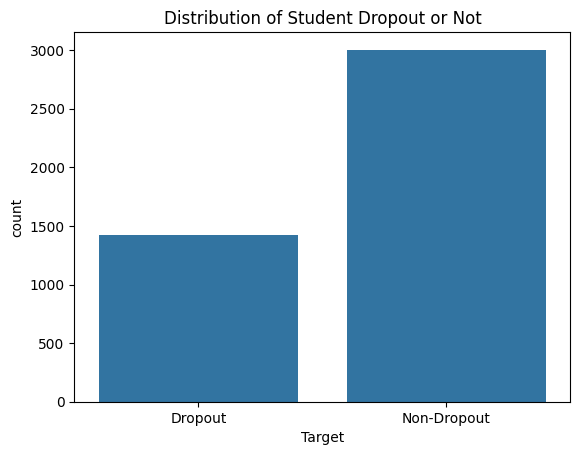

In [12]:
# Check Targeted Column
sns.countplot(x='Target', data=df)
plt.title('Distribution of Student Dropout or Not')
plt.show()

In [13]:
# crosscheck the features
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

df_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Marital status,object,0,0.00,6,"[facto union, widower]"
1,Application mode,object,0,0.00,18,[1st phase - special contingent (Azores Island...
2,Application order,int64,0,0.00,8,"[1, 5]"
3,Course,object,0,0.00,17,"[Veterinary Nursing, Animation and Multimedia ..."
4,Daytime/evening attendance,object,0,0.00,2,"[evening, daytime]"
5,Previous qualification,object,0,0.00,17,"[Other - 11th year of schooling, Higher educat..."
6,Previous qualification (grade),float64,0,0.00,101,"[144.0, 157.0]"
7,Nacionality,object,0,0.00,21,"[Cape Verdean, Cuban]"
8,Mother's qualification,object,0,0.00,29,"[7th year of schooling, 9th Year - Not Completed]"
9,Father's qualification,object,5,0.11,29,"[Technological specialization course, Basic ed..."


In [14]:
# Select all numeric columns
num_cols = df.select_dtypes(include=['number']).columns.tolist()

In [15]:
# Select categorical columns, excluding target
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove target column if present
if 'Target' in cat_cols:
    cat_cols.remove('Target')

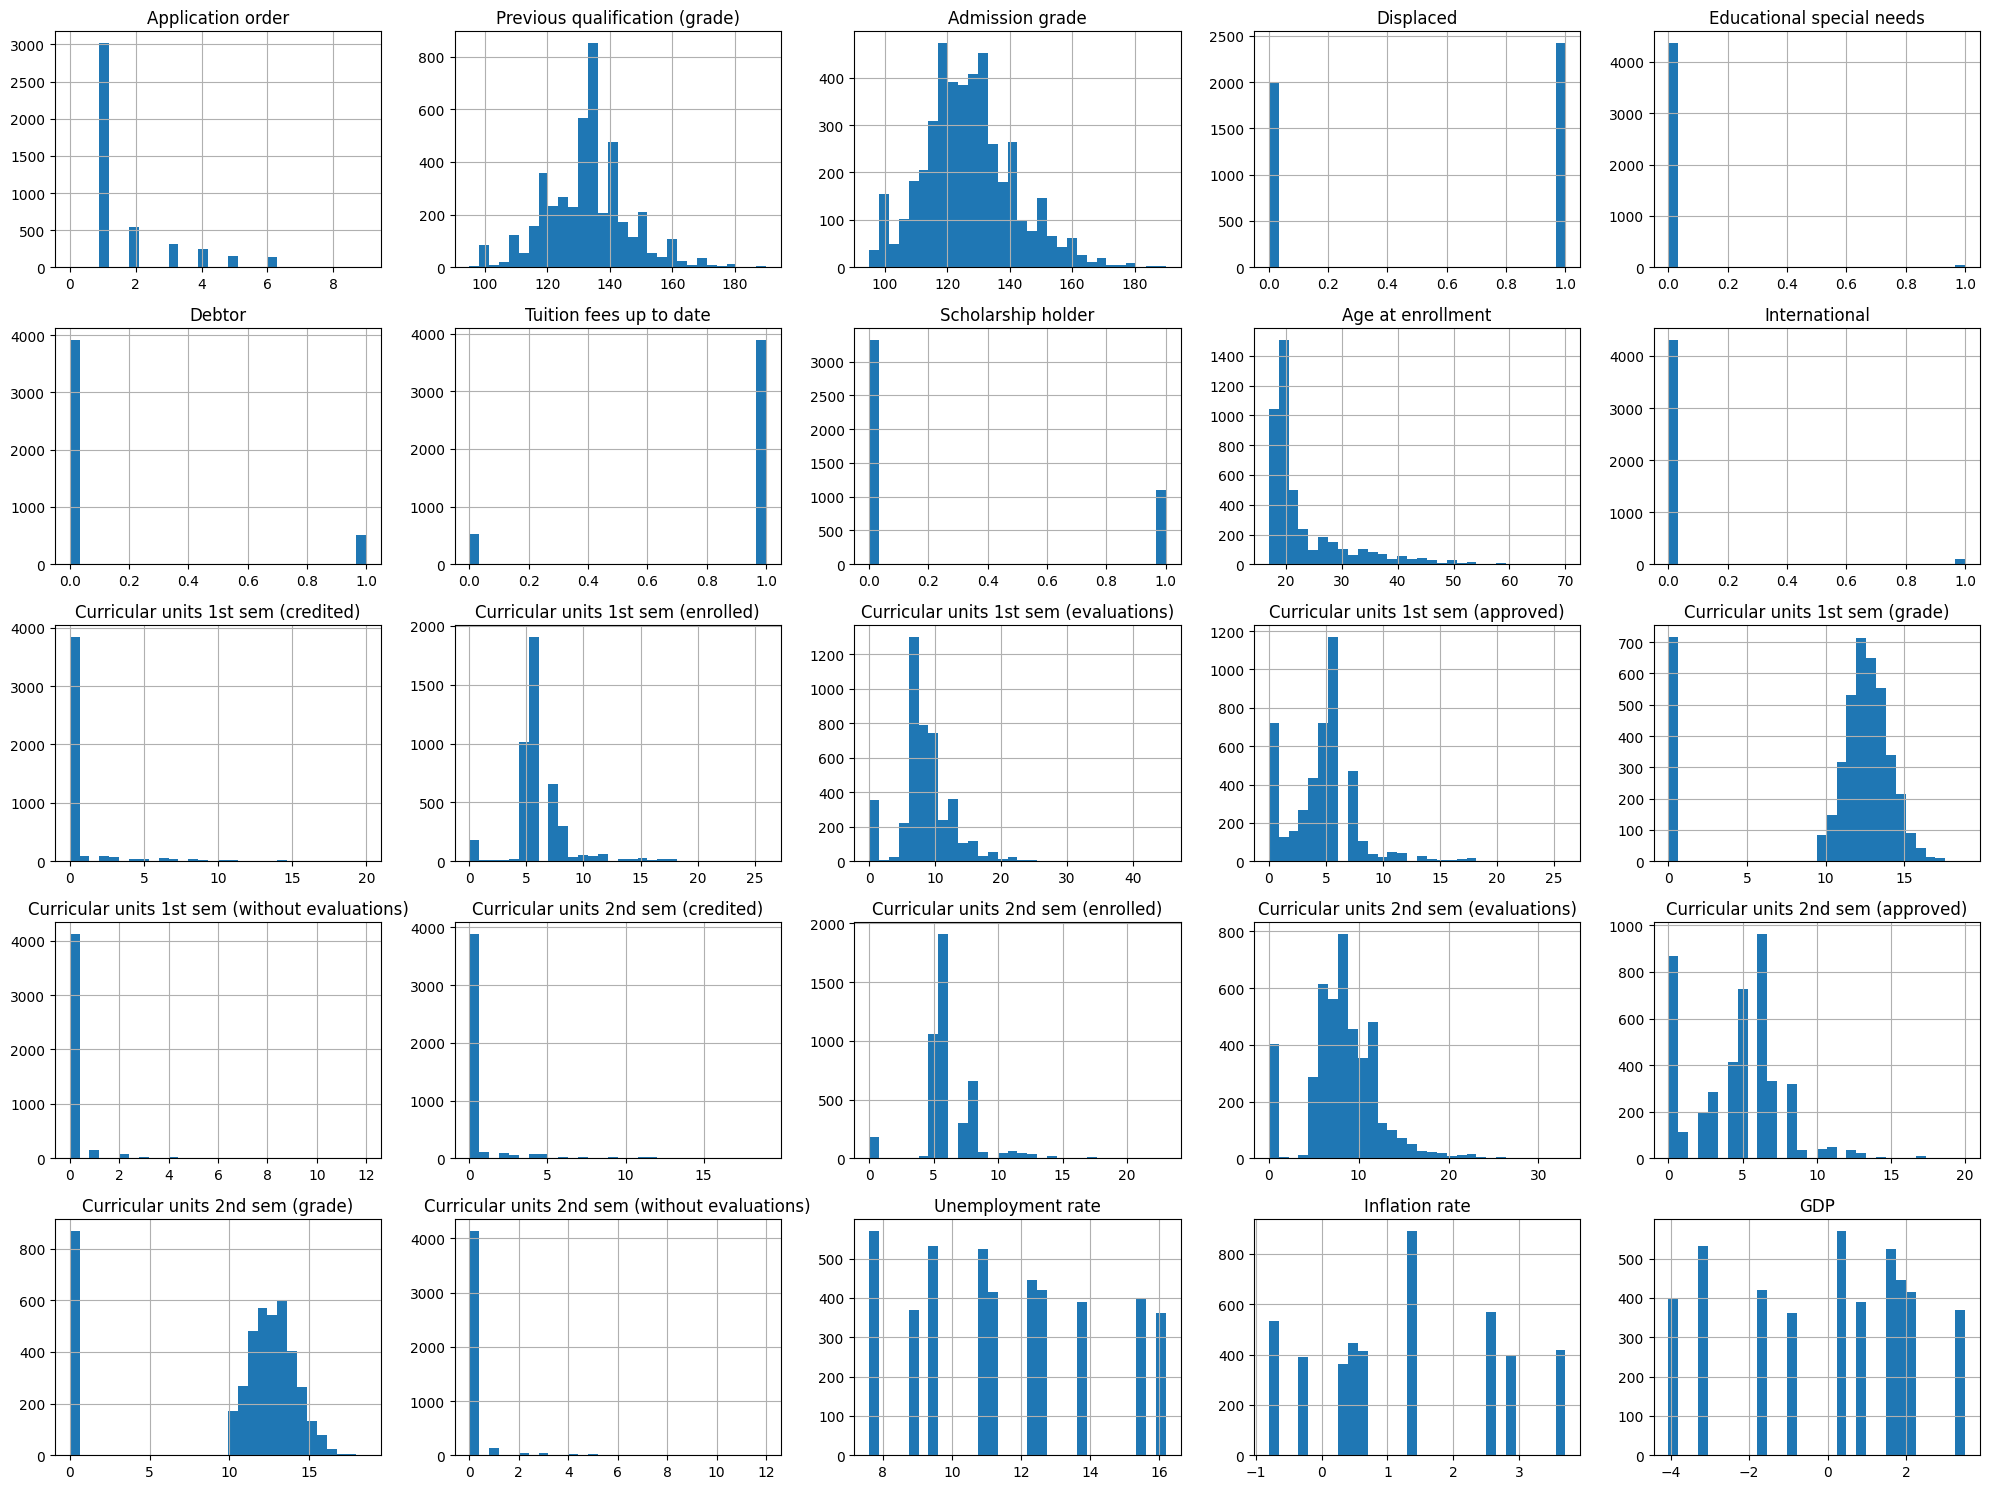

In [16]:
# Check distribution of numerical data
df[num_cols].hist(bins=30, figsize=(20,15))
plt.tight_layout()
plt.show()

**Interpretation of Numerical Variables**

**1. Application Order**
- Most students applied with their **first choice (0)**.
- Very few chose the 2nd–8th options.
- **Insight:** The majority of students are enrolled in their preferred program.

**2. Previous Qualification (Grade)**
- Approximately **normal distribution** peaking around **120–140**.
- A few outliers below 100 and above 170.
- **Insight:** Most students had relatively good grades in their previous education.

**3. Admission Grade**
- Close to a normal distribution, concentrated between **110–150**.
- Some outliers below 100.
- **Insight:** Entry exam grades are mostly in the medium-to-high range.

**4. Binary Features (Displaced, Educational Special Needs, Debtor, Tuition Fees Up to Date, Scholarship Holder, International)**
- Strongly imbalanced; majority are `0`.
- **Insight:** Most students are not displaced, not international, not debtors, and do not have special needs.

**5. Age at Enrollment**
- **Right-skewed** distribution:
  - Peak at **18–20 years old**.
  - Declines after 25, with a few outliers up to 60+.
- **Insight:** Most students are young (fresh high school graduates).

**6. Curricular Units (1st & 2nd Semester: credited, enrolled, evaluations, approved, grade)**
- **Enrolled:** Most students take **5–8 courses per semester**.
- **Evaluations:** Similar pattern; some outliers with 30–40 evaluations.
- **Approved:** Distribution aligns with enrolled → many students pass all courses.
- **Grade:** Approximately normal between **10–15** (scale 0–20).
- **Without Evaluations:** Mostly `0` → most courses have at least one evaluation.
- **Insight:** Academic load is concentrated around 5–8 subjects, with moderate-to-high pass rates.

**7. Macroeconomic Variables (Unemployment Rate, Inflation Rate, GDP)**
- **Unemployment:** 8–16% range, suggesting multiple years of data.
- **Inflation:** Varies; some negative values indicating deflation.
- **GDP:** -4 to 2 range, capturing periods of economic downturn.
- **Insight:** Macroeconomic factors may influence dropout rates, especially during high unemployment.

---

**Key Takeaways**
- Students are predominantly young, local, and not in debt.
- Previous grades and admission scores lean towards mid-to-high performance.
- Academic performance shows most students pass their courses.
- Strong class imbalance in binary features should be addressed in modeling.
- External economic conditions (unemployment, GDP) could be important predictors for dropout behavior.


In [17]:
# Encode target variable: 0 = Dropout, 1 = Non-Dropout (Graduate/Enrolled)
df['Target'] = df['Target'].apply(lambda x: 0 if x == 'Dropout' else 1)

### Bivariate

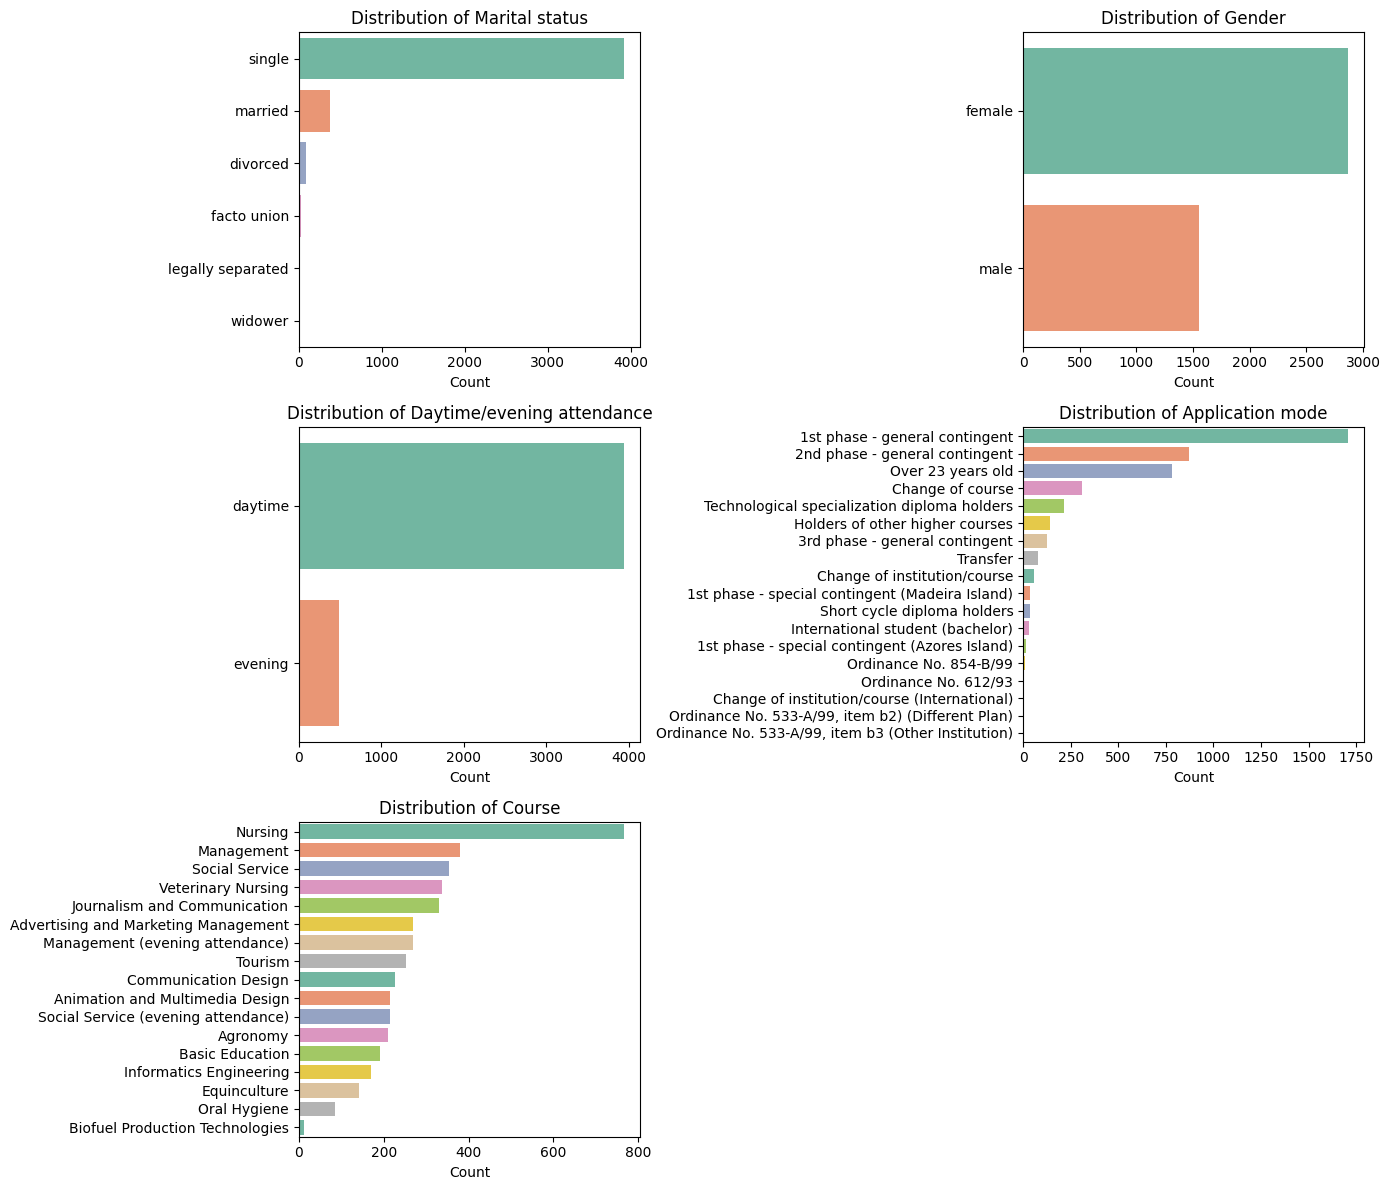

In [18]:
# Group 1: Important & short labels
important_cats = ['Marital status', 'Gender', 'Daytime/evening attendance',
                  'Application mode', 'Course']

n_cols = 2
n_rows = math.ceil(len(important_cats)/n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(important_cats):
    order = df[col].value_counts().index
    sns.countplot(y=col, data=df, ax=axes[i], order=order, palette='Set2')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('Count')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

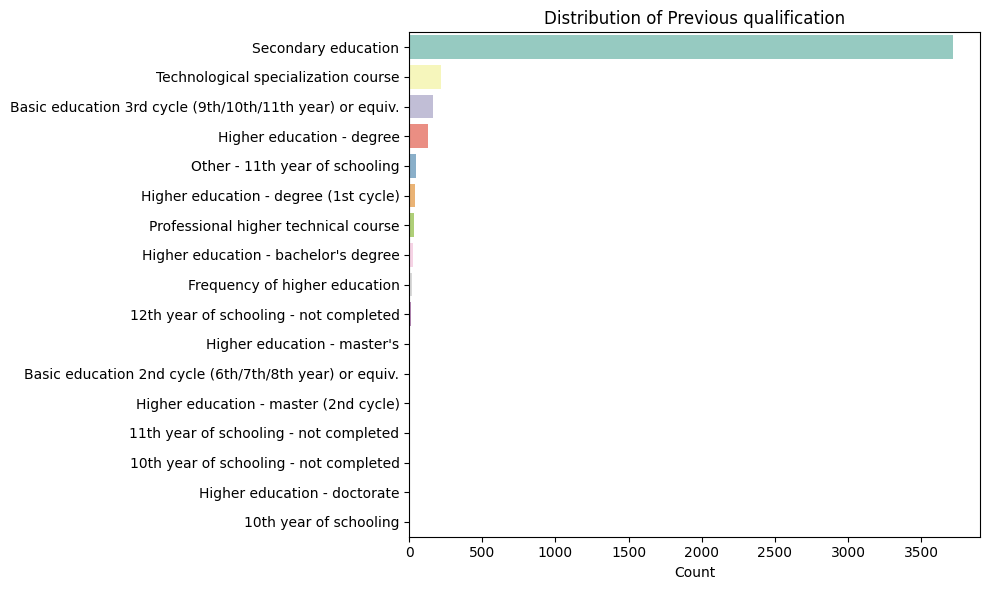

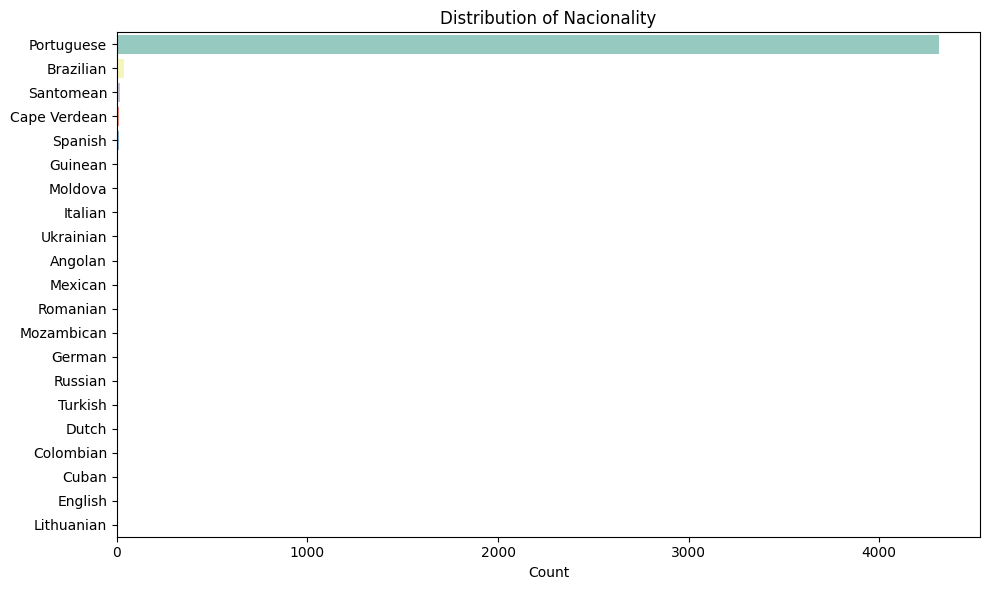

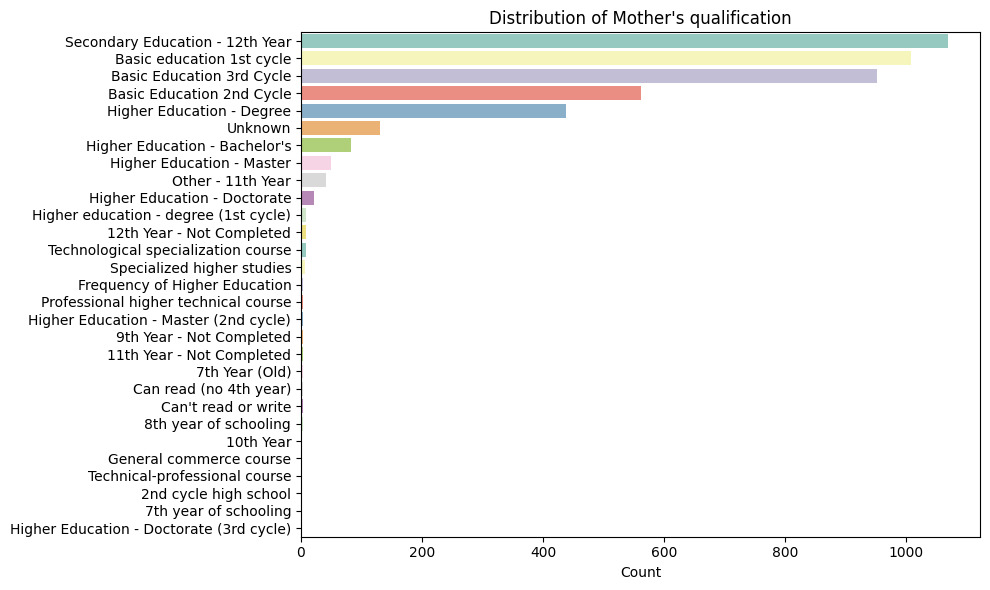

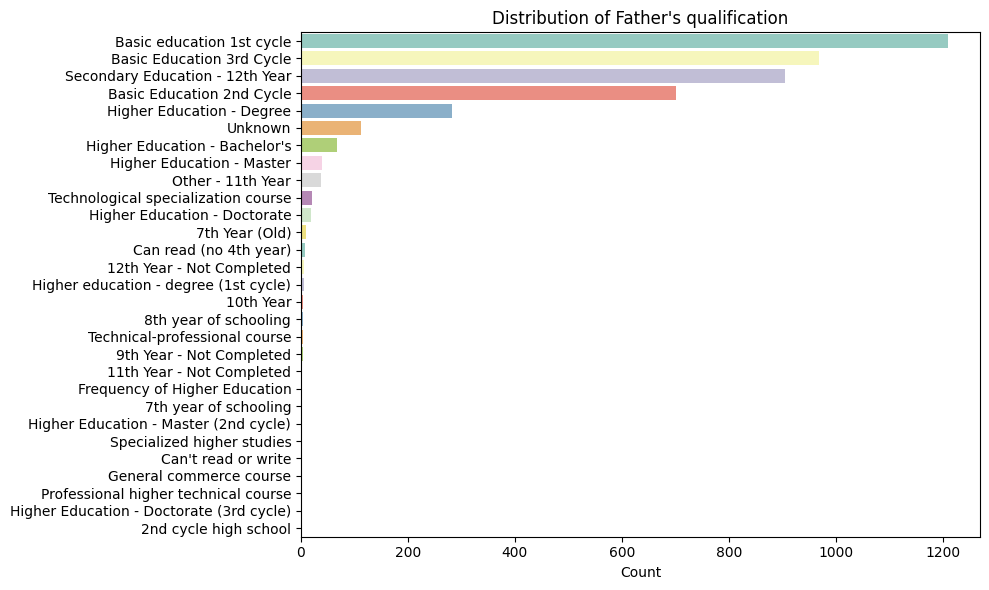

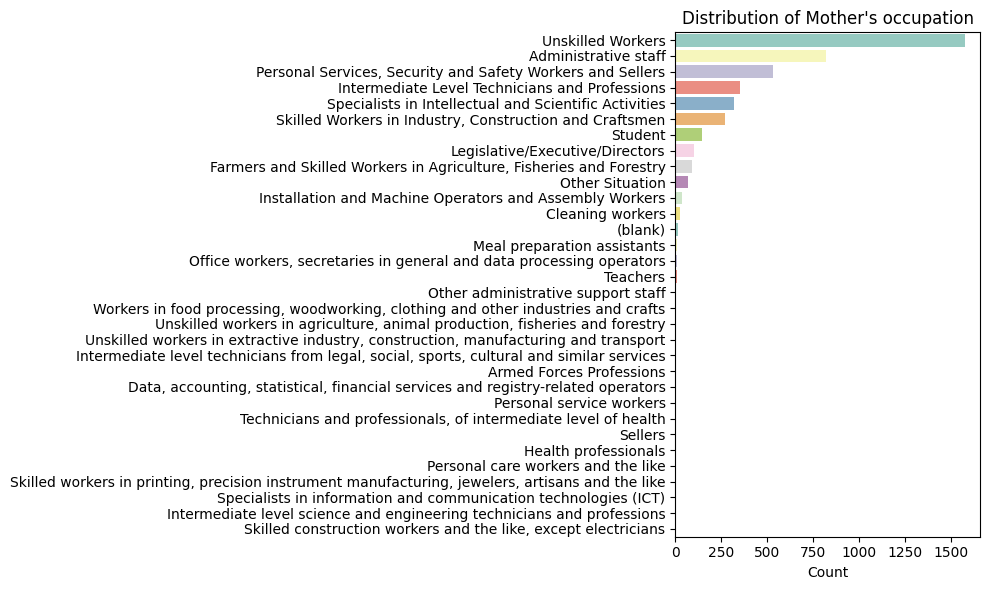

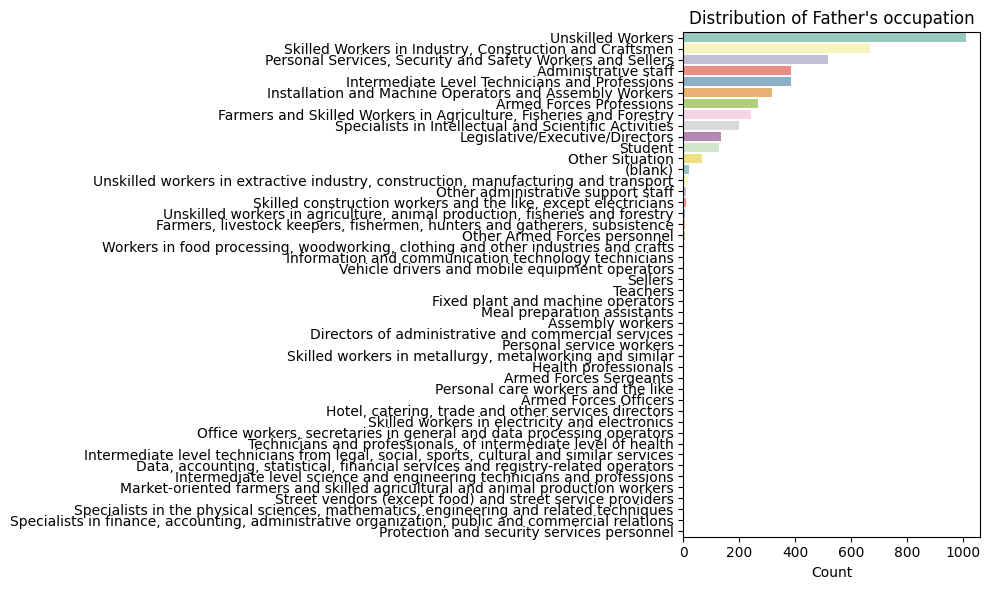

In [19]:
# Group 2: Long categorical variables
other_cats = ['Previous qualification', 'Nacionality', "Mother's qualification",
              "Father's qualification", "Mother's occupation", "Father's occupation"]

for col in other_cats:
    plt.figure(figsize=(10,6))
    order = df[col].value_counts().index
    sns.countplot(y=col, data=df, order=order, palette='Set3')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

### Feature Grouping for Preprocessing

To improve model performance and reduce noise, several categorical variables will be grouped based on their distribution.

**1. Marital Status**
- Original categories: `single`, `married`, `widower`, `divorced`, `facto union`, `legally separated`
- **New groups:**
  - **Single**
  - **Married**
  - **Others** (widower, divorced, facto union, legally separated)

*Reason:* The dataset is dominated by `single` and `married`, while other categories have very few records. Grouping rare categories avoids sparsity and improves generalization.

---

**2. Application Mode**
- Multiple categories such as `1st phase - general contingent`, `2nd phase - general contingent`, `Ordinance No. 612/93`, etc.
- **New groups:**
  - **Top 5 most frequent categories** kept as is.
  - **Others** for all remaining categories.

*Reason:* Keeps the most informative modes while reducing noise from very rare categories.

---

**3. Previous Qualification**
- Original categories include secondary education, higher education degrees, professional courses, etc.
- **New groups:**
  - **Secondary Education**
  - **Others** (all other qualifications)

*Reason:* Majority of students come from secondary education. Grouping helps simplify the feature without losing key information.

---

**4. Nacionality**
- Original categories: Portuguese, German, Spanish, etc.
- **New groups:**
  - **Portuguese**
  - **Others**

*Reason:* The dataset is heavily imbalanced toward Portuguese nationality. Grouping rare nationalities avoids high-cardinality issues.

---

**5. Mother’s Qualification & Father’s Qualification**
- Multiple education levels from basic education to higher education degrees.
- **New groups:**
  - **Top 5 most frequent qualifications**
  - **Others** for less frequent values.

*Reason:* Reduces sparsity by focusing on dominant categories while still capturing the impact of parental education.

---

**6. Mother’s Occupation & Father’s Occupation**
- Various occupation codes (e.g., teachers, administrative staff, skilled workers).
- **New groups:**
  - **Top 5 most frequent occupations**
  - **Others** for all remaining categories.

*Reason:* Occupation distribution is highly skewed; grouping preserves the main patterns while reducing noise.


In [20]:
# Copy Dataset
df_prep = df.copy()

# Marital Status (Single, Married, Others)
valid_marital = ['single', 'married']
df_prep['Marital status'] = df_prep['Marital status'].apply(
    lambda x: x if x in valid_marital else 'others'
)

# Application Mode (Top 5)
top5_app_mode = df_prep['Application mode'].value_counts().nlargest(5).index
df_prep['Application mode'] = df_prep['Application mode'].apply(
    lambda x: x if x in top5_app_mode else 'others'
)

# Previous Qualification (Secondary education vs Others)
df_prep['Previous qualification'] = df_prep['Previous qualification'].apply(
    lambda x: 'Secondary education' if x == 'Secondary education' else 'Others'
)

# Nacionality (Portuguese vs Others)
df_prep['Nacionality'] = df_prep['Nacionality'].apply(
    lambda x: 'Portuguese' if x == 'Portuguese' else 'Others'
)

# Mother's & Father's Qualification (Top 5)
for col in ["Mother's qualification", "Father's qualification"]:
    top5 = df_prep[col].value_counts().nlargest(5).index
    df_prep[col] = df_prep[col].apply(lambda x: x if x in top5 else 'Others')

# Mother's & Father's Occupation (Top 5)
for col in ["Mother's occupation", "Father's occupation"]:
    top5 = df_prep[col].value_counts().nlargest(5).index
    df_prep[col] = df_prep[col].apply(lambda x: x if x in top5 else 'Others')

In [21]:
# Select categorical columns, excluding target
cat_cols = df_prep.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove target column if present
if 'Target' in cat_cols:
    cat_cols.remove('Target')

for col in cat_cols:
    print(f"\n{col}")
    print(df_prep[col].value_counts())


Marital status
Marital status
single     3919
married     379
others      126
Name: count, dtype: int64

Application mode
Application mode
1st phase - general contingent                  1708
2nd phase - general contingent                   872
Over 23 years old                                785
others                                           534
Change of course                                 312
Technological specialization diploma holders     213
Name: count, dtype: int64

Course
Course
Nursing                                 766
Management                              380
Social Service                          355
Veterinary Nursing                      337
Journalism and Communication            331
Advertising and Marketing Management    268
Management (evening attendance)         268
Tourism                                 252
Communication Design                    226
Animation and Multimedia Design         215
Social Service (evening attendance)     215
Agronomy         

**Feature Transformation Rationale**

**1. Application Mode (Top 5 + Others)**
- **Reason:** Many categories had very few students, leading to noise and sparsity after encoding.  
- **Action:** Kept the 5 most significant categories (based on count & business relevance) and grouped the rest as *Others* to reduce dimensionality.

**2. Course (Shortened Names)**
- **Reason:** Some course names were very long, making visualization and interpretation harder.  
- **Action:** Shortened names while maintaining meaning to make charts and reports easier to read.

**3. Previous Qualification (Binary: Secondary vs Others)**
- **Reason:** Distribution was heavily dominated by *Secondary Education*, while other categories were rare.  
- **Action:** Converted into a binary feature to highlight the key distinction between students with a secondary education background vs others, which is relevant to dropout prediction.

**4. Nationality (Portuguese vs Others)**
- **Reason:** The majority of students were Portuguese, with other nationalities having very small counts.  
- **Action:** Binarized into *Portuguese* vs *Others* to capture the main difference without overfitting to minority classes.

**5. Mother’s & Father’s Qualification (Top 5 vs Others)**
- **Reason:** Many unique categories had low frequency, which would cause sparsity in one-hot encoding.  
- **Action:** Kept the 5 most frequent and relevant qualifications, grouped the rest into *Others* to simplify and strengthen the model.

**6. Mother’s & Father’s Occupation (Top 5 vs Others)**
- **Reason:** Similar to qualifications, the distribution of occupations was highly imbalanced.  
- **Action:** Focused on the 5 most representative occupations to reduce complexity and help the model find stronger patterns.

In [22]:
# Application Mode (shorten top 5, others grouped)
app_mode_short = {
    '1st phase - general contingent': '1st phase',
    '2nd phase - general contingent': '2nd phase',
    'Over 23 years old': 'Over 23',
    'Change of course': 'Change course',
    'Technological specialization diploma holders': 'Tech spec'
}
df_prep['Application mode'] = df_prep['Application mode'].replace(app_mode_short).apply(
    lambda x: x if x in app_mode_short.values() else 'Others'
)

# Course (shorten long names)
course_short = {
    'Advertising and Marketing Management': 'Adv & Mktg',
    'Journalism and Communication': 'Journalism',
    'Animation and Multimedia Design': 'Anim & Multimedia',
    'Social Service (evening attendance)': 'Social Service (E)',
    'Management (evening attendance)': 'Management (E)',
    'Biofuel Production Technologies': 'Biofuel Tech',
    'Veterinary Nursing': 'Vet Nursing',
    'Informatics Engineering': 'Info Eng',
    'Communication Design': 'Comm Design',
    'Basic Education': 'Basic Edu'
}
df_prep['Course'] = df_prep['Course'].replace(course_short)

# Previous Qualification (binary: Secondary vs Others)
df_prep['Previous qualification'] = df_prep['Previous qualification'].apply(
    lambda x: 'Secondary education' if x == 'Secondary education' else 'Others'
)

# Nacionality (Portuguese vs Others)
df_prep['Nacionality'] = df_prep['Nacionality'].apply(
    lambda x: 'Portuguese' if x == 'Portuguese' else 'Others'
)

# Mother's & Father's Qualification (top 5 vs Others, shorten names)
qual_short = {
    'Secondary Education - 12th Year': 'Sec Edu 12th',
    'Basic education 1st cycle': 'Basic 1st',
    'Basic Education 3rd Cycle': 'Basic 3rd',
    'Basic Education 2nd Cycle': 'Basic 2nd',
    'Higher Education - Degree': 'Higher Deg'
}
df_prep["Mother's qualification"] = df_prep["Mother's qualification"].replace(qual_short).apply(
    lambda x: x if x in qual_short.values() else 'Others'
)
df_prep["Father's qualification"] = df_prep["Father's qualification"].replace(qual_short).apply(
    lambda x: x if x in qual_short.values() else 'Others'
)

# Mother's & Father's Occupation (top 5 vs Others, shorten names)
occ_short = {
    'Unskilled Workers': 'Unskilled',
    'Administrative staff': 'Admin staff',
    'Personal Services, Security and Safety Workers and Sellers': 'Services/Security',
    'Intermediate Level Technicians and Professions': 'Technicians',
    'Specialists in Intellectual and Scientific Activities': 'Specialists',
    'Skilled Workers in Industry, Construction and Craftsmen': 'Skilled Industry'
}
df_prep["Mother's occupation"] = df_prep["Mother's occupation"].replace(occ_short).apply(
    lambda x: x if x in occ_short.values() else 'Others'
)
df_prep["Father's occupation"] = df_prep["Father's occupation"].replace(occ_short).apply(
    lambda x: x if x in occ_short.values() else 'Others'
)

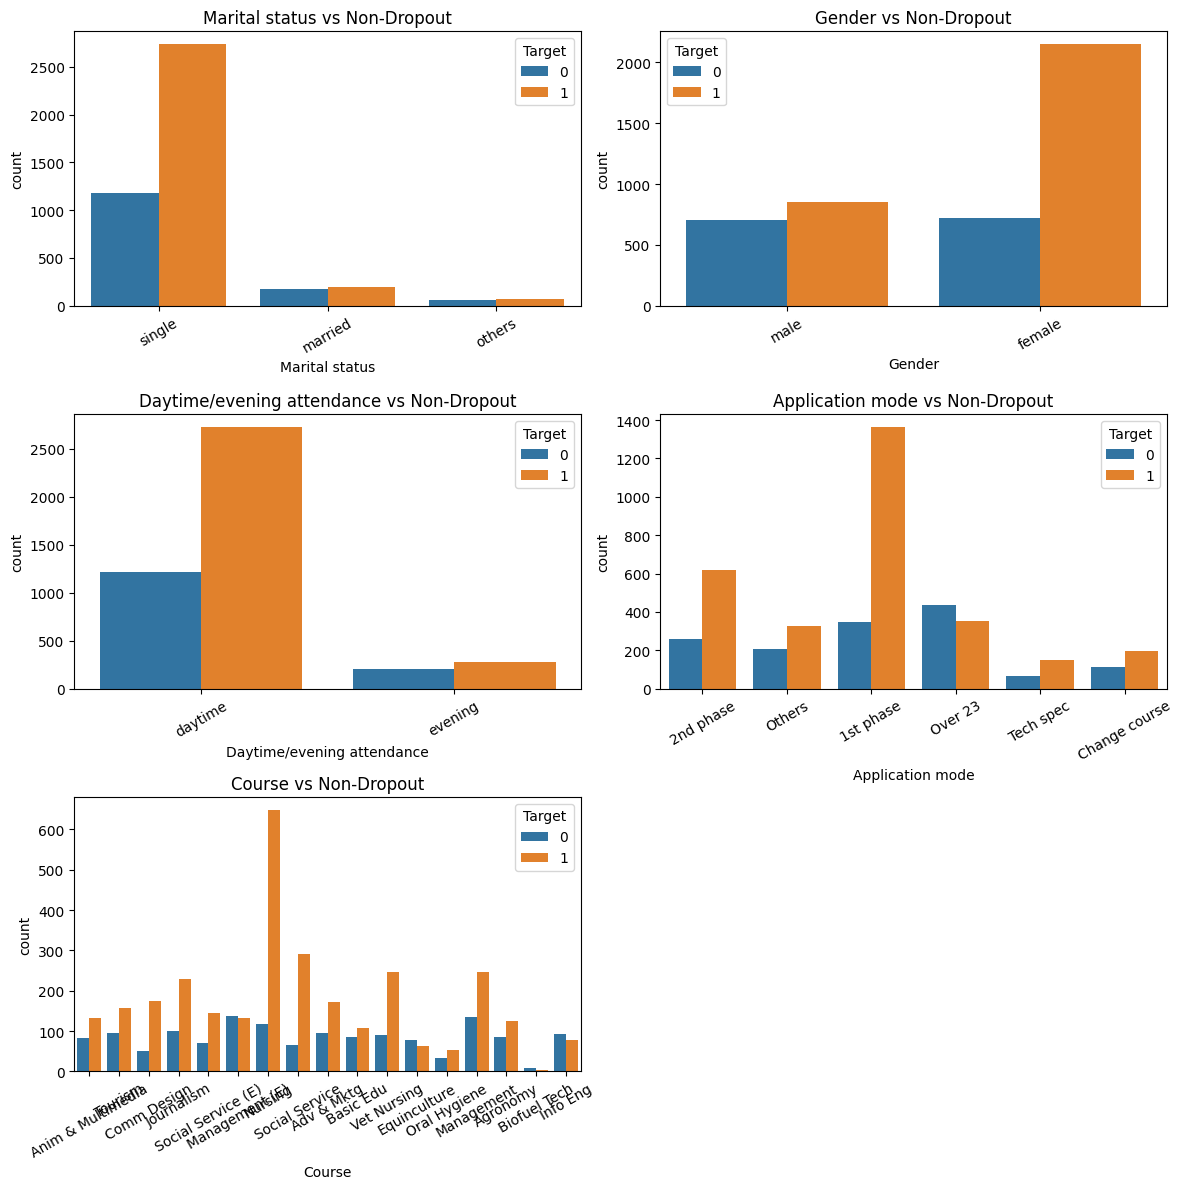

In [23]:
# Bivariate Analysis: Categorial Features vs Dropout
n_cols = 2  
n_rows = math.ceil(len(important_cats)/n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(important_cats):
    sns.countplot(x=col, hue='Target', data=df_prep, ax=axes[i])
    axes[i].set_title(f'{col} vs Non-Dropout')
    axes[i].tick_params(axis='x', rotation=30)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

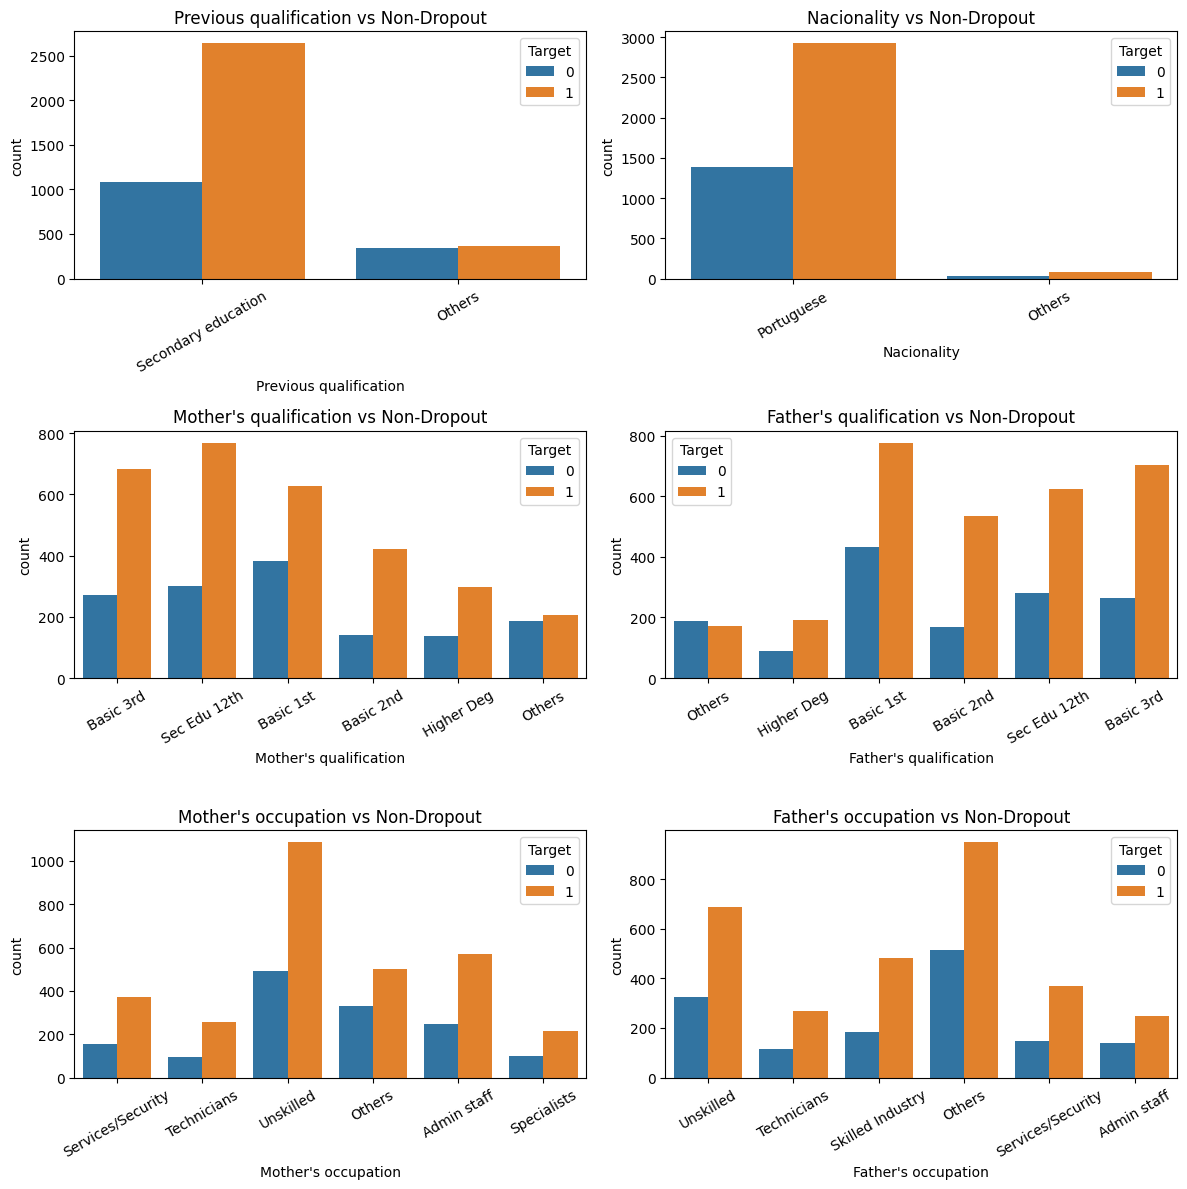

In [24]:
# Bivariate Analysis: Categorial Features vs Dropout
n_cols = 2  
n_rows = math.ceil(len(other_cats)/n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(other_cats):
    sns.countplot(x=col, hue='Target', data=df_prep, ax=axes[i])
    axes[i].set_title(f'{col} vs Non-Dropout')
    axes[i].tick_params(axis='x', rotation=30)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

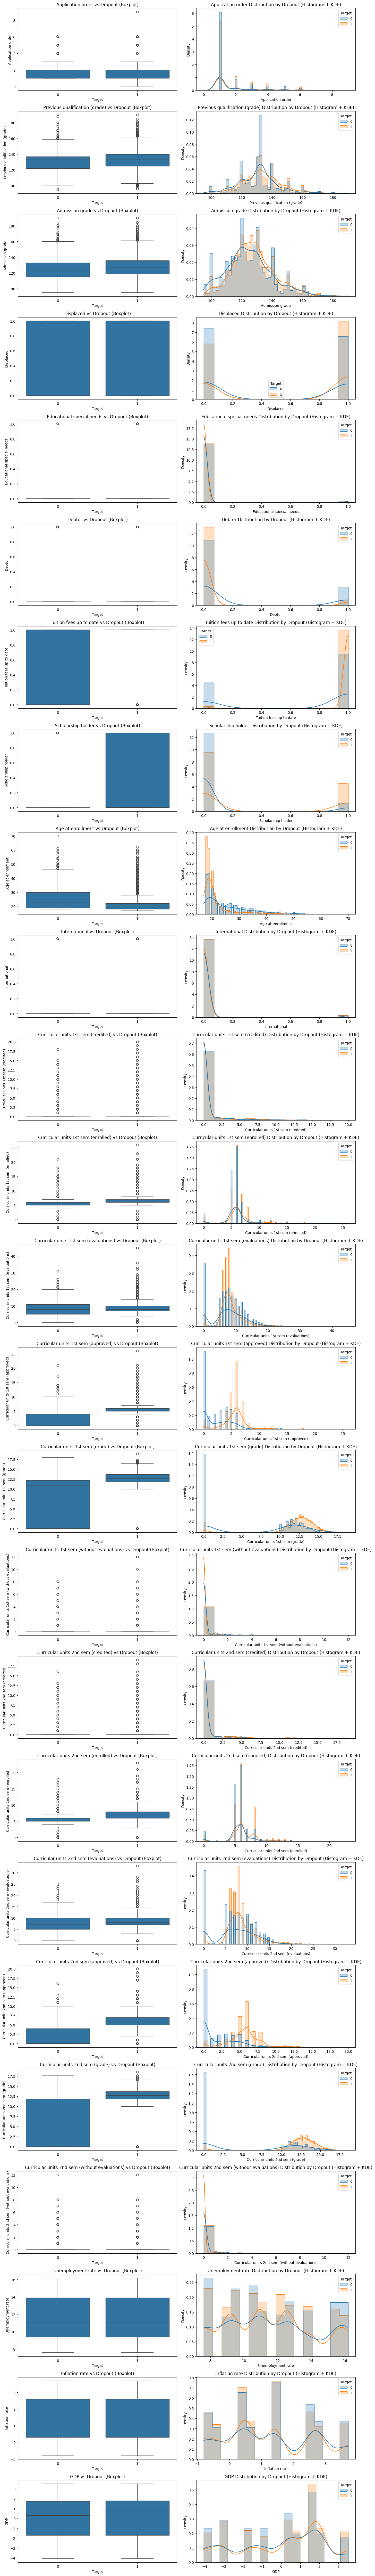

In [25]:
# Bivariate Analysis: Numerical Features vs Dropout
n_rows = len(num_cols)
fig, axes = plt.subplots(n_rows, 2, figsize=(14, n_rows * 4))

for i, col in enumerate(num_cols):
    # Left: Boxplot (Numerical feature vs Dropout status)
    sns.boxplot(x='Target', y=col, data=df_prep, ax=axes[i, 0])
    axes[i, 0].set_title(f'{col} vs Dropout (Boxplot)')

    # Right: Histogram + KDE per class
    sns.histplot(data=df_prep, x=col, hue='Target', kde=True,
                 ax=axes[i, 1], element='step', stat='density', common_norm=False)
    axes[i, 1].set_title(f'{col} Distribution by Dropout (Histogram + KDE)')

plt.tight_layout()
plt.show()

**Bivariate Analysis Insights**

**1. Numerical Features**
- **Curricular Units (1st & 2nd Semester Approved)**  
  - Non-dropout students have a higher number of approved units compared to dropout students.  
  - Grade distribution shows a clear separation between the two groups.  

- **Curricular Units (Grades)**  
  - Average grades in both semesters tend to be higher for non-dropout students.  
  - Dropouts are more common among students with lower grades.  

- **Admission Grade**  
  - Students with higher admission grades are less likely to drop out.  
  - There is a positive correlation between admission grades and retention.  

- **Tuition Payment & Scholarships**  
  - Students who keep tuition fees up to date or hold scholarships show significantly lower dropout rates.  

---

**2. Categorical Features**
- **Marital Status**  
  - The majority of dropouts are single students.  

- **Gender**  
  - No significant difference in dropout rates between male and female students.  

- **Daytime/Evening Attendance**  
  - Daytime students show a higher dropout rate compared to evening students.  

- **Application Mode**  
  - "Others," "Over 23," and "Change Course" application modes are strongly associated with higher dropout rates.  
  - "1st Phase" applicants tend to have better retention.  

- **Previous Qualification**  
  - Students coming from "Secondary Education" backgrounds make up the largest proportion of dropouts.  

- **Nationality**  
  - Portuguese students have the highest dropout rates compared to other nationalities.  

- **Parents' Qualification & Occupation**  
  - Lower parental education levels (Basic 1st/3rd) and unskilled occupations correlate with higher dropout risk.  
  - Parents working in services/security or as specialists are associated with lower dropout rates among students.


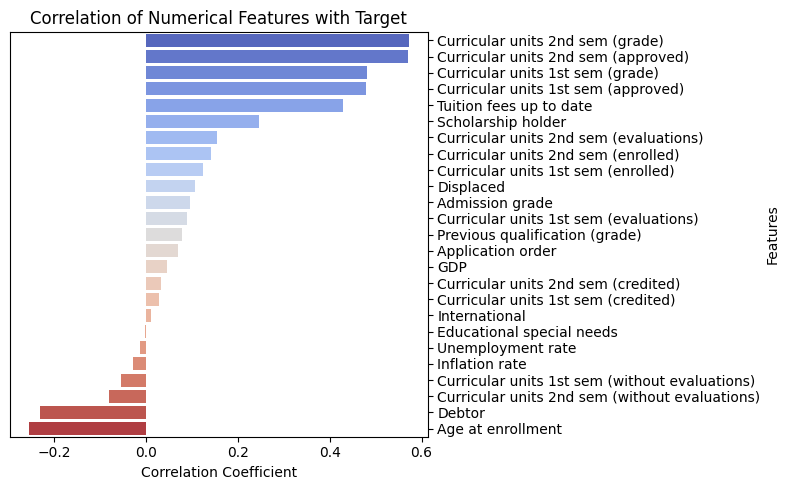

In [26]:
# Copy dataframe to avoid changing original
df_corr = df_prep.copy()

# Select numeric columns including target
num_cols = df_corr.select_dtypes(include=['number']).columns

# Compute correlation matrix
corr_matrix = df_corr[num_cols].corr()

# Plot correlation of numerical features with target
plt.figure(figsize=(8,5))
sns.barplot(
    x=corr_matrix['Target'].drop('Target').sort_values(ascending=False),
    y=corr_matrix['Target'].drop('Target').sort_values(ascending=False).index,
    palette='coolwarm'
)
plt.title('Correlation of Numerical Features with Target')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right()

plt.tight_layout()
plt.show()


From the correlation plot I generated, I found that all numerical features have correlations with the target (Dropout / Non-Dropout) in the range of -0.2 to 0.6.

- This indicates that there are no extremely strong correlations between any feature and the target.

- The values mostly fall into the weak to moderate range, which is typical for churn datasets.

- None of the features show signs of data leakage or redundancy based on this analysis.

**Conclusion:**
The features are safe to keep for modeling, as their correlations are balanced and can still provide useful signals without dominating the model.

### Outlier Analysis

In [27]:
# Function to identify outliers
def find_outliers(data):
    q1 = np.percentile(data, 25)  # First quartile (25th percentile)
    q3 = np.percentile(data, 75)  # Third quartile (75th percentile)
    iqr = q3 - q1  # Interquartile Range (IQR)
    print(f'IQR: {iqr}')

    lower_limit = q1 - 1.5 * iqr  # Lower bound for outliers
    upper_limit = q3 + 1.5 * iqr  # Upper bound for outliers
    outliers = data[(data < lower_limit) | (data > upper_limit)]  # Identify outliers
    
    minimal=data.min()
    maximal=data.max()
    print(f'Min: {minimal}')
    print(f'Max: {maximal}')
    print(f'Lower Limit: {lower_limit}') 
    print(f'Upper Limit: {upper_limit}') 
    print(f'Number of outliers: {len(outliers)}')

In [28]:
for i in num_cols:
    print('Feature:',i)
    find_outliers(df_prep[i])
    print('=======================')

Feature: Application order
IQR: 1.0
Min: 0
Max: 9
Lower Limit: -0.5
Upper Limit: 3.5
Number of outliers: 541
Feature: Previous qualification (grade)
IQR: 15.0
Min: 95.0
Max: 190.0
Lower Limit: 102.5
Upper Limit: 162.5
Number of outliers: 179
Feature: Admission grade
IQR: 16.900000000000006
Min: 95.0
Max: 190.0
Lower Limit: 92.55
Upper Limit: 160.15000000000003
Number of outliers: 86
Feature: Displaced
IQR: 1.0
Min: 0
Max: 1
Lower Limit: -1.5
Upper Limit: 2.5
Number of outliers: 0
Feature: Educational special needs
IQR: 0.0
Min: 0
Max: 1
Lower Limit: 0.0
Upper Limit: 0.0
Number of outliers: 51
Feature: Debtor
IQR: 0.0
Min: 0
Max: 1
Lower Limit: 0.0
Upper Limit: 0.0
Number of outliers: 503
Feature: Tuition fees up to date
IQR: 0.0
Min: 0
Max: 1
Lower Limit: 1.0
Upper Limit: 1.0
Number of outliers: 528
Feature: Scholarship holder
IQR: 0.0
Min: 0
Max: 1
Lower Limit: 0.0
Upper Limit: 0.0
Number of outliers: 1099
Feature: Age at enrollment
IQR: 6.0
Min: 17
Max: 70
Lower Limit: 10.0
Upper Lim

Result outlier detection:

**1. Application order**
- **IQR:** 1.0  
- **Lower Limit:** -0.5  
- **Upper Limit:** 3.5  
- **Number of Outliers:** 541  
- **Action:** I decided to **keep** this feature because the variation likely reflects different application patterns. I will apply robust scaling.

**2. Previous qualification (grade)**
- **IQR:** 15.0  
- **Lower Limit:** 102.5  
- **Upper Limit:** 162.5  
- **Number of Outliers:** 179  
- **Action:** I chose to **keep** this feature since extreme values are still relevant. I may cap values at the upper limit.

**3. Admission grade**
- **IQR:** 16.9  
- **Lower Limit:** 92.55  
- **Upper Limit:** 160.15  
- **Number of Outliers:** 86  
- **Action:** I will **keep** this feature because entrance scores naturally vary. I plan to use robust scaling.

**4. Displaced**
- **IQR:** 1.0  
- **Lower Limit:** -1.5  
- **Upper Limit:** 2.5  
- **Number of Outliers:** 0  
- **Action:** I decided to **drop** this feature due to very low variance and minimal predictive power.

**5. Educational special needs**
- **IQR:** 0.0  
- **Lower Limit:** 0.0  
- **Upper Limit:** 0.0  
- **Number of Outliers:** 51  
- **Action:** I chose to **drop** this feature because almost all values are zero, providing minimal variance.

**6. Debtor**
- **IQR:** 0.0  
- **Lower Limit:** 0.0  
- **Upper Limit:** 0.0  
- **Number of Outliers:** 503  
- **Action:** I will **keep** this binary feature since it could be a strong predictor of dropout.

**7. Tuition fees up to date**
- **IQR:** 0.0  
- **Lower Limit:** 1.0  
- **Upper Limit:** 1.0  
- **Number of Outliers:** 528  
- **Action:** I decided to **drop** this feature because almost all values are identical, providing no variance.

**8. Scholarship holder**
- **IQR:** 0.0  
- **Lower Limit:** 0.0  
- **Upper Limit:** 0.0  
- **Number of Outliers:** 1099  
- **Action:** I will **keep** this feature even with imbalance since financial aid status may impact dropout. I will handle imbalance later if needed.

**9. Age at enrollment**
- **IQR:** 6.0  
- **Lower Limit:** 10.0  
- **Upper Limit:** 34.0  
- **Number of Outliers:** 441  
- **Action:** I plan to **cap** values above 34.0 because extreme ages likely represent anomalies.

**10. International**
- **IQR:** 0.0  
- **Lower Limit:** 0.0  
- **Upper Limit:** 0.0  
- **Number of Outliers:** 110  
- **Action:** I decided to **drop** this feature due to very low variance, as almost all students are local.

**11. Curricular units 1st sem (credited)**
- **IQR:** 0.0  
- **Lower Limit:** 0.0  
- **Upper Limit:** 0.0  
- **Number of Outliers:** 577  
- **Action:** I chose to **drop** this feature since almost all values are zero and it adds little value.

**12. Curricular units 1st sem (enrolled)**
- **IQR:** 2.0  
- **Lower Limit:** 2.0  
- **Upper Limit:** 10.0  
- **Number of Outliers:** 424  
- **Action:** I will **keep** this feature as course load variation is informative. I plan to apply robust scaling.

**13. Curricular units 1st sem (evaluations)**
- **IQR:** 4.0  
- **Lower Limit:** 0.0  
- **Upper Limit:** 16.0  
- **Number of Outliers:** 158  
- **Action:** I decided to **keep** this feature since evaluation counts are meaningful. Robust scaling will be applied.

**14. Curricular units 1st sem (approved)**
- **IQR:** 3.0  
- **Lower Limit:** -1.5  
- **Upper Limit:** 10.5  
- **Number of Outliers:** 180  
- **Action:** I will **keep** this feature and may cap extreme upper values to reduce skew.

**15. Curricular units 1st sem (grade)**
- **IQR:** 2.4  
- **Lower Limit:** 7.4  
- **Upper Limit:** 17.0  
- **Number of Outliers:** 726  
- **Action:** I plan to **cap** values above 17.0 to handle extreme grades.

**16. Curricular units 1st sem (without evaluations)**
- **IQR:** 0.0  
- **Lower Limit:** 0.0  
- **Upper Limit:** 0.0  
- **Number of Outliers:** 294  
- **Action:** I decided to **drop** this feature as it is mostly zeros and provides little predictive power.

**17. Curricular units 2nd sem (credited)**
- **IQR:** 0.0  
- **Lower Limit:** 0.0  
- **Upper Limit:** 0.0  
- **Number of Outliers:** 530  
- **Action:** I chose to **drop** this feature due to very low variance.

**18. Curricular units 2nd sem (enrolled)**
- **IQR:** 2.0  
- **Lower Limit:** 2.0  
- **Upper Limit:** 10.0  
- **Number of Outliers:** 369  
- **Action:** I will **keep** this feature and use robust scaling.

**19. Curricular units 2nd sem (evaluations)**
- **IQR:** 4.0  
- **Lower Limit:** 0.0  
- **Upper Limit:** 16.0  
- **Number of Outliers:** 109  
- **Action:** I decided to **keep** this feature because evaluation counts are relevant for performance.

**20. Curricular units 2nd sem (approved)**
- **IQR:** 4.0  
- **Lower Limit:** -4.0  
- **Upper Limit:** 12.0  
- **Number of Outliers:** 44  
- **Action:** I will **keep** this feature and cap values above 12.0 to limit extreme cases.

**21. Curricular units 2nd sem (grade)**
- **IQR:** 2.58  
- **Lower Limit:** 6.87  
- **Upper Limit:** 17.21  
- **Number of Outliers:** 877  
- **Action:** I plan to **cap** values above 17.2 to reduce the effect of outliers.

**22. Curricular units 2nd sem (without evaluations)**
- **IQR:** 0.0  
- **Lower Limit:** 0.0  
- **Upper Limit:** 0.0  
- **Number of Outliers:** 282  
- **Action:** I decided to **drop** this feature because it is mostly zeros with little contribution.

**23. Unemployment rate**
- **IQR:** 4.5  
- **Lower Limit:** 2.65  
- **Upper Limit:** 20.65  
- **Number of Outliers:** 0  
- **Action:** I will **keep** this macroeconomic factor as-is.

**24. Inflation rate**
- **IQR:** 2.3  
- **Lower Limit:** -3.15  
- **Upper Limit:** 6.05  
- **Number of Outliers:** 0  
- **Action:** I will **keep** this feature as a macroeconomic indicator.

**25. GDP**
- **IQR:** 3.49  
- **Lower Limit:** -6.94  
- **Upper Limit:** 7.03  
- **Number of Outliers:** 0  
- **Action:** I will **keep** this feature since it provides important economic context.

In [29]:
# Drop low-variance features
drop_features = [
    'Displaced',
    'Educational special needs',
    'Tuition fees up to date',
    'International',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (without evaluations)'
]
df_prep = df_prep.drop(columns=drop_features)

In [30]:
# Apply outlier capping based on calculated limits
caps = {
    'Application order': (-0.5, 3.5),
    'Previous qualification (grade)': (102.5, 162.5),
    'Admission grade': (92.55, 160.15),
    'Age at enrollment': (10.0, 34.0),
    'Curricular units 1st sem (approved)': (-1.5, 10.5),
    'Curricular units 1st sem (grade)': (7.4, 17.0),
    'Curricular units 2nd sem (approved)': (-4.0, 12.0),
    'Curricular units 2nd sem (grade)': (6.87, 17.21)
}

for col, (lower, upper) in caps.items():
    df_prep[col] = np.where(df_prep[col] < lower, lower, df_prep[col])
    df_prep[col] = np.where(df_prep[col] > upper, upper, df_prep[col])

### Check Clean Data

In [31]:
df_prep.describe(include='all')

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target
count,4424,4424,4424.000000,4424,4424,4424,4424.000000,4424,4424,4424,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
unique,3,6,NaN,17,2,2,NaN,2,6,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,single,1st phase,NaN,Nursing,daytime,Secondary education,NaN,Portuguese,Sec Edu 12th,Basic 1st,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3919,1708,NaN,766,3941,3717,NaN,4314,1069,1209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.568829,NaN,NaN,NaN,132.501831,NaN,NaN,NaN,...,4.583635,11.840735,6.232143,8.063291,4.406420,11.580381,11.566139,1.228029,0.001969,0.678797
std,NaN,NaN,0.918791,NaN,NaN,NaN,12.592465,NaN,NaN,NaN,...,2.726349,2.308755,2.195951,3.947951,2.915854,2.636609,2.663850,1.382711,2.269935,0.466991
min,NaN,NaN,0.000000,NaN,NaN,NaN,102.500000,NaN,NaN,NaN,...,0.000000,7.400000,0.000000,0.000000,0.000000,6.870000,7.600000,-0.800000,-4.060000,0.000000
25%,NaN,NaN,1.000000,NaN,NaN,NaN,125.000000,NaN,NaN,NaN,...,3.000000,11.000000,5.000000,6.000000,2.000000,10.750000,9.400000,0.300000,-1.700000,0.000000
50%,NaN,NaN,1.000000,NaN,NaN,NaN,133.100000,NaN,NaN,NaN,...,5.000000,12.285714,6.000000,8.000000,5.000000,12.200000,11.100000,1.400000,0.320000,1.000000
75%,NaN,NaN,2.000000,NaN,NaN,NaN,140.000000,NaN,NaN,NaN,...,6.000000,13.400000,7.000000,10.000000,6.000000,13.333333,13.900000,2.600000,1.790000,1.000000


### Feature Selection 
I chose **not to use all available features** for modeling and focused only on those that are most relevant for predicting student dropout.

---

#### Why I am not using all features

- **Reduce Noise:**  
  Features with very low variance or mostly constant values add little to no predictive power and can increase model noise.

- **Avoid Redundancy:**  
  Some features capture the same information and are highly correlated. Keeping all of them risks multicollinearity.

- **Improve Generalization:**  
  Selecting only relevant features helps the model focus on true patterns, reducing the risk of overfitting.

- **Handle Skewed Distributions:**  
  Features that are heavily imbalanced (e.g., *Educational Special Needs*, *International*) provide minimal information and will be removed or transformed.

- **Business Relevance:**  
  Only features that reflect academic performance, socio-economic background, and financial status are prioritized because they are directly related to dropout prediction.

---

### Selected Features

**Demographics**
- Marital Status  
- Nationality (Portuguese vs Others)

**Admission Information**
- Application Mode (Top 5 categories)  
- Application Order  
- Previous Qualification (Secondary vs Others)  
- Previous Qualification Grade  
- Admission Grade  

**Socio-Economic Background**
- Mother’s Qualification (Top 5 categories)  
- Father’s Qualification (Top 5 categories)  
- Mother’s Occupation (Top 5 categories)  
- Father’s Occupation (Top 5 categories)  

**Academic Performance**
- Curricular Units 1st Sem (Enrolled, Approved, Grade)  
- Curricular Units 2nd Sem (Enrolled, Approved, Grade)  

**Financial Indicators**
- Debtor  
- Tuition Fees Up to Date  
- Scholarship Holder  

---

### Dropped Features

**Low Variance / Highly Imbalanced**
- Educational Special Needs  
- International  

**Redundant or Minimal Impact**
- Curricular Units (Credited, Without Evaluations)  
- Curricular Unit Counts with very low predictive value  

**Weak Business Relevance**
- Macro-economic indicators (GDP, Inflation Rate) unless proven significant  
- Features with excessive missing values or unclear connection to dropout  

---

**Conclusion**
By focusing on the most relevant demographic, academic, and financial features while dropping redundant and low-impact variables, the model is expected to become **more robust, interpretable, and generalizable** for predicting student dropout.


In [32]:
# Target
y = df_prep['Target']

# Selected Features for X
selected_features = [
    # Demographics
    'Marital status', 'Nacionality',

    # Admission Information
    'Application mode', 'Application order',
    'Previous qualification', 'Previous qualification (grade)', 'Admission grade',

    # Socio-Economic Background
    "Mother's qualification", "Father's qualification",
    "Mother's occupation", "Father's occupation",

    # Academic Performance
    'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',

    # Financial Indicators
    'Debtor', 'Scholarship holder'
]

X = df_prep[selected_features]

In [33]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Marital status                          4424 non-null   object 
 1   Application mode                        4424 non-null   object 
 2   Application order                       4424 non-null   float64
 3   Course                                  4424 non-null   object 
 4   Daytime/evening attendance              4424 non-null   object 
 5   Previous qualification                  4424 non-null   object 
 6   Previous qualification (grade)          4424 non-null   float64
 7   Nacionality                             4424 non-null   object 
 8   Mother's qualification                  4424 non-null   object 
 9   Father's qualification                  4424 non-null   object 
 10  Mother's occupation                     4424 non-null   obje

### Data Preprocessing

Prepare the dataset for modeling by applying appropriate encoding and scaling techniques based on feature types and distribution characteristics.

---

**Categorical Features**

For all selected categorical variables (e.g., *Marital Status*, *Nacionality*, *Application Mode*, *Qualifications*, *Occupations*), I used **One-Hot Encoding**:

- **Reason:**  
  - These variables are nominal with no inherent order.  
  - One-Hot Encoding avoids imposing artificial ranking between categories.  
  - Allows the model to learn separate weights for each category.

---

**Numerical Features**

1. Robust Scaling for Outlier-Prone Features:
    - **Features:**  
      - *Application Order*  
      - *Previous Qualification (Grade)*  
      - *Admission Grade*  
      - *Curricular Units 1st Sem (Enrolled, Approved, Grade)*  
      - *Curricular Units 2nd Sem (Enrolled, Approved, Grade)*

    - **Reason:**  
      - These features showed significant outliers from IQR analysis.  
      - **RobustScaler** uses median and IQR, making it less sensitive to extreme values.

2. Standard Scaling for Other Numeric Features:
    - **Features:**  
      - *Debtor*  
      - *Tuition Fees Up to Date*  
      - *Scholarship Holder*

    - **Reason:**  
      - These features have balanced distributions with minimal outliers.  
      - **StandardScaler** normalizes values to mean 0 and variance 1, improving model convergence.

---

**Why This Approach?**
- **Preserves variance and avoids bias:** Different scalers for different distributions ensure proper normalization without distorting data.  
- **Prevents data leakage:** Preprocessing is wrapped in a `Pipeline` so transformations are learned only from training data.  
- **Model-friendly format:** One-Hot Encoding and scaling produce a numerical matrix compatible with most ML algorithms.

**Note:** I used a preprocessing pipeline to handle scaling and encoding in one consistent step, making the workflow cleaner, reducing data leakage, and simplifying model training and testing.

In [34]:
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [35]:
# Separate numerical and categorical features
num_cols = X.select_dtypes(include=['number']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Numeric columns with heavy outliers → RobustScaler
robust_cols = [
    'Application order', 'Previous qualification (grade)', 'Admission grade',
    'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)'
]

# Preprocessor
preprocessor = ColumnTransformer([
    ('robust', RobustScaler(), robust_cols),
    ('standard', StandardScaler(), [col for col in num_cols if col not in robust_cols]),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), cat_cols)
])

# Final pipeline
full_pipeline = Pipeline([
    ('transform', preprocessor)
])


### Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# Splitting training and test data with a proportion of 80:20
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.2,
    random_state=42)

### Applying Pipeline

In [38]:
# Transform
X_train = full_pipeline.fit_transform(X_train)
X_test = full_pipeline.transform(X_test)

## III. Modeling

### Model Benchmarking

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [40]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier(verbose=-1)

In [41]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [42]:
models = [logreg, knn, dt, rf, xgb, lgbm]
scores = []
means = []
stds = []

for model in models:
    skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    model_cv = cross_val_score(model, X_train, y_train, cv=skfold, scoring='roc_auc')
    scores.append(model_cv)
    means.append(model_cv.mean())
    stds.append(model_cv.std())

results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
    'Mean ROC-AUC': means,
    'Std Dev': stds
})
results_df = results_df.set_index('Model').sort_values(by='Mean ROC-AUC', ascending=False)

# Display results table
print("\nModel Performance Based on ROC-AUC Score:")
print(results_df)



Model Performance Based on ROC-AUC Score:
                     Mean ROC-AUC   Std Dev
Model                                      
Logistic Regression      0.899227  0.011633
LightGBM                 0.898124  0.014005
Random Forest            0.898051  0.012596
XGBoost                  0.888098  0.014167
KNN                      0.846706  0.011938
Decision Tree            0.753944  0.016223


In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score, roc_curve
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

### Evaluate Model Performance on the Test Dataset

In [44]:
score_roc_auc = []

# Loop to train and evaluate each model
for model, model_name in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    
    # Store ROC-AUC score
    score_roc_auc.append(roc_auc_score(y_test, y_pred_proba))
    
    # Display classification report
    print(f"{model_name}:\n", classification_report(y_test, y_pred))

# Display results in a DataFrame
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
    'ROC-AUC Score': score_roc_auc
})
results_df = results_df.set_index('Model').sort_values(by='ROC-AUC Score', ascending=False)

# Display results table
print("\nModel Performance Based on ROC-AUC Score:")
print(results_df)


Logistic Regression:
               precision    recall  f1-score   support

           0       0.85      0.69      0.76       284
           1       0.86      0.94      0.90       601

    accuracy                           0.86       885
   macro avg       0.86      0.82      0.83       885
weighted avg       0.86      0.86      0.86       885

KNN:
               precision    recall  f1-score   support

           0       0.83      0.62      0.71       284
           1       0.84      0.94      0.89       601

    accuracy                           0.84       885
   macro avg       0.83      0.78      0.80       885
weighted avg       0.84      0.84      0.83       885

Decision Tree:
               precision    recall  f1-score   support

           0       0.70      0.65      0.67       284
           1       0.84      0.87      0.85       601

    accuracy                           0.80       885
   macro avg       0.77      0.76      0.76       885
weighted avg       0.80      0

The chosen model is Logistic Regression based on its strong performance in both cross-validation and test datasets.

---
Since Logistic Regression performed the best, we proceeded to check multicollinearity using VIF.

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
# Get X (features) after pipeline transformation
X = X_train.copy()

# If the transformed result is a numpy array, convert it to a DataFrame with feature names
if not isinstance(X, pd.DataFrame):
    try:
        feature_names = preprocessor.get_feature_names_out()
        X = pd.DataFrame(X, columns=feature_names)
    except:
        X = pd.DataFrame(X)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort by highest VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data)

                                            Feature        VIF
13                      cat__Nacionality_Portuguese  20.513112
12                       cat__Marital status_single  13.271684
3       robust__Curricular units 1st sem (enrolled)  11.166194
6       robust__Curricular units 2nd sem (enrolled)  10.419233
19  cat__Previous qualification_Secondary education   9.460198
4       robust__Curricular units 1st sem (approved)   8.396473
7       robust__Curricular units 2nd sem (approved)   8.008807
35                  cat__Father's occupation_Others   4.872214
8          robust__Curricular units 2nd sem (grade)   4.861533
5          robust__Curricular units 1st sem (grade)   4.066996
39               cat__Father's occupation_Unskilled   3.897857
34               cat__Mother's occupation_Unskilled   3.753256
24         cat__Mother's qualification_Sec Edu 12th   3.435037
22           cat__Mother's qualification_Higher Deg   2.946902
37        cat__Father's occupation_Skilled Industry   2

There are several features with VIF greater than 10, indicating multicollinearity, so we will drop those features.

In [47]:
# Get feature names from the preprocessor (OneHotEncoder + Scaler)
feature_names = preprocessor.get_feature_names_out()

# Convert to DataFrame
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Drop columns with high VIF
high_vif_features = [
    'cat__Nacionality_Portuguese',
    'cat__Marital status_single',
    'robust__Curricular units 1st sem (enrolled)',
    'robust__Curricular units 2nd sem (enrolled)'
]

X_train_reduced = X_train_df.drop(columns=high_vif_features, errors='ignore')
X_test_reduced = X_test_df.drop(columns=high_vif_features, errors='ignore')


### Handling Imbalance

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold, cross_validate
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [49]:
# Logistic Regression Models
logreg = LogisticRegression(max_iter=500, solver='liblinear', class_weight=None, random_state=42)
logreg_balanced = LogisticRegression(max_iter=500, solver='liblinear', class_weight='balanced', random_state=42)

# Metrics for evaluation
scoring = {
    'accuracy': 'accuracy',
    'roc_auc': 'roc_auc',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
}

# Stratified K-Fold for cross-validation
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Pipeline with Random OverSampling (ROS)
pipeline_ros = imbPipeline([
    ('ros', RandomOverSampler(random_state=42)),
    ('model', logreg)
])

# Pipeline with SMOTE
pipeline_smote = imbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', logreg)
])

In [50]:
# Cross-validation
cv_no_resample = cross_validate(logreg, X_train_reduced, y_train, cv=skfold, scoring=scoring)
cv_ros = cross_validate(pipeline_ros, X_train_reduced, y_train, cv=skfold, scoring=scoring)
cv_smote = cross_validate(pipeline_smote, X_train_reduced, y_train, cv=skfold, scoring=scoring)
cv_balanced = cross_validate(logreg_balanced, X_train_reduced, y_train, cv=skfold, scoring=scoring)

In [51]:
# Train final models and evaluate on the test set
pipeline_ros.fit(X_train_reduced, y_train)
pipeline_smote.fit(X_train_reduced, y_train)
logreg.fit(X_train_reduced, y_train)
logreg_balanced.fit(X_train_reduced, y_train)

y_pred_ros = pipeline_ros.predict(X_test_reduced)
y_pred_smote = pipeline_smote.predict(X_test_reduced)
y_pred_no_resample = logreg.predict(X_test_reduced)
y_pred_balanced = logreg_balanced.predict(X_test_reduced)

y_proba_ros = pipeline_ros.predict_proba(X_test_reduced)[:, 1]
y_proba_smote = pipeline_smote.predict_proba(X_test_reduced)[:, 1]
y_proba_no_resample = logreg.predict_proba(X_test_reduced)[:, 1]
y_proba_balanced = logreg_balanced.predict_proba(X_test_reduced)[:, 1]

In [52]:
# Evaluation function
def evaluate(y_true, y_pred, y_proba):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'roc_auc': roc_auc_score(y_true, y_proba),
        'f1': f1_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred)
    }

test_scores = pd.DataFrame({
    "Metric": list(scoring.keys()),
    "No Resampling": list(evaluate(y_test, y_pred_no_resample, y_proba_no_resample).values()),
    "ROS": list(evaluate(y_test, y_pred_ros, y_proba_ros).values()),
    "SMOTE": list(evaluate(y_test, y_pred_smote, y_proba_smote).values()),
    "Class Weight": list(evaluate(y_test, y_pred_balanced, y_proba_balanced).values())
})

In [53]:
# Display results
print("\nCross-validation (mean scores)")
print(f"No Resampling:\n{pd.DataFrame(cv_no_resample).mean()}")
print(f"\nROS:\n{pd.DataFrame(cv_ros).mean()}")
print(f"\nSMOTE:\n{pd.DataFrame(cv_smote).mean()}")
print(f"\nClass Weight Balanced:\n{pd.DataFrame(cv_balanced).mean()}")

print("\nTest Set Performance:")
print(test_scores.to_string(index=False))


Cross-validation (mean scores)
No Resampling:
fit_time          0.029080
score_time        0.028192
test_accuracy     0.837524
test_roc_auc      0.878994
test_f1           0.884015
test_precision    0.857363
test_recall       0.912583
dtype: float64

ROS:
fit_time          0.051174
score_time        0.030372
test_accuracy     0.818880
test_roc_auc      0.878115
test_f1           0.862467
test_precision    0.889515
test_recall       0.837235
dtype: float64

SMOTE:
fit_time          0.082505
score_time        0.035046
test_accuracy     0.812664
test_roc_auc      0.877431
test_f1           0.857584
test_precision    0.885314
test_recall       0.831823
dtype: float64

Class Weight Balanced:
fit_time          0.032003
score_time        0.029518
test_accuracy     0.818034
test_roc_auc      0.878540
test_f1           0.861844
test_precision    0.888247
test_recall       0.837240
dtype: float64

Test Set Performance:
   Metric  No Resampling      ROS    SMOTE  Class Weight
 accuracy       0.8

After testing different techniques to handle class imbalance (Random Oversampling, SMOTE, and Class Weights) on the Logistic Regression model, I decided to **keep the standard model without any resampling**.

Reason for Choosing the Standard Model
- No performance gain from resampling: Both ROS and SMOTE yielded identical metrics to the baseline.
- High recall without resampling: The model achieved a 0.94 recall, meeting the goal of identifying as many at-risk students as possible.
- Balanced performance: ROC-AUC and F1-score remained strong, indicating good generalization without oversampling.
- Simplicity: Avoids unnecessary complexity and reduces the risk of overfitting by keeping the original dataset.

**Final Decision:** Use the standard Logistic Regression model without resampling as it provides the best trade-off between recall, F1-score, and generalization.

### Hypertuning Parameter

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

# Baseline Logistic Regression

baseline_model = LogisticRegression(max_iter=500, random_state=42)
baseline_model.fit(X_train_reduced, y_train)
y_pred_base = baseline_model.predict(X_test_reduced)
y_proba_base = baseline_model.predict_proba(X_test_reduced)[:, 1]


In [55]:
# Hyperparameter Tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    LogisticRegression(max_iter=500, random_state=42),
    param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train_reduced, y_train)

# Best model from tuning
best_logreg = grid_search.best_estimator_
y_pred_tuned = best_logreg.predict(X_test_reduced)
y_proba_tuned = best_logreg.predict_proba(X_test_reduced)[:, 1]


In [56]:
# Evaluation Function
def eval_metrics(y_true, y_pred, y_proba):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'ROC_AUC': roc_auc_score(y_true, y_proba),
        'F1': f1_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred)
    }

baseline_scores = eval_metrics(y_test, y_pred_base, y_proba_base)
tuned_scores = eval_metrics(y_test, y_pred_tuned, y_proba_tuned)


In [57]:
# Compare Results
results_df = pd.DataFrame([baseline_scores, tuned_scores], index=['Baseline', 'Tuned'])
print("Test Set Performance Comparison:")
print(results_df)
print("\nBest Parameters from Grid Search:", grid_search.best_params_)

Test Set Performance Comparison:
          Accuracy   ROC_AUC        F1  Precision    Recall
Baseline  0.835028  0.893558  0.883758   0.847328  0.923461
Tuned     0.835028  0.893546  0.883758   0.847328  0.923461

Best Parameters from Grid Search: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


The baseline logistic regression model is already optimal with current features and preprocessing. Hyperparameter tuning does not bring additional benefit.

### Feature Impotance

In [58]:
best_logreg = baseline_model

In [59]:
# Extract coefficients from the best Logistic Regression model
coefficients = best_logreg.coef_[0]

# Ensure X_train is a DataFrame with the original column names
feature_importance = pd.DataFrame({
    'Feature': X_train_reduced.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Display the top 20 most important features
print(feature_importance.head(20))

                                            Feature  Coefficient
5       robust__Curricular units 2nd sem (approved)     1.869092
15  cat__Previous qualification_Secondary education     0.855906
12                     cat__Application mode_Others    -0.813823
13                    cat__Application mode_Over 23    -0.790701
11              cat__Application mode_Change course    -0.707609
10                  cat__Application mode_2nd phase    -0.497422
6          robust__Curricular units 2nd sem (grade)     0.473182
32       cat__Father's occupation_Services/Security     0.469271
31                  cat__Father's occupation_Others     0.388093
7                                  standard__Debtor    -0.380748
8                      standard__Scholarship holder     0.372790
14                  cat__Application mode_Tech spec     0.357739
24               cat__Father's qualification_Others    -0.350115
33        cat__Father's occupation_Skilled Industry     0.289308
9                        

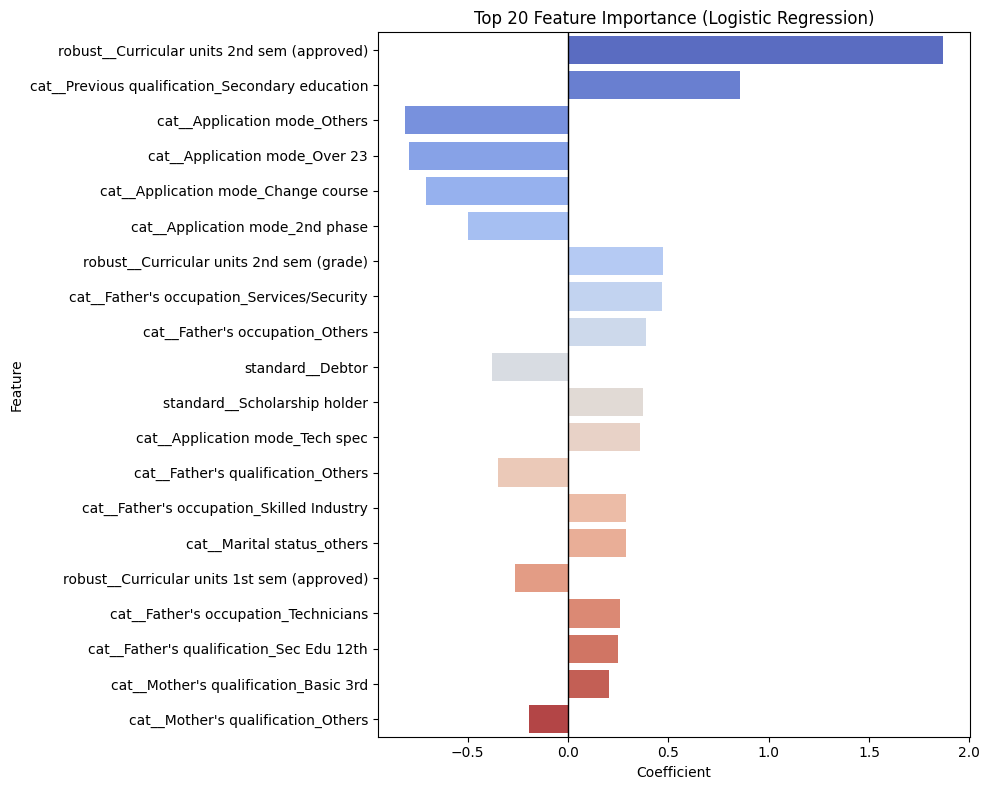

In [60]:
# Plot top 20 features only
top_features = feature_importance.head(20)

plt.figure(figsize=(10, 8))
sns.barplot(data=top_features, x='Coefficient', y='Feature', palette='coolwarm')
plt.title('Top 20 Feature Importance (Logistic Regression)')
plt.axvline(0, color='black', linewidth=1)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Key Insights:
1. Curricular Units 2nd Semester (Approved) has the largest positive coefficient (+1.87), meaning more approved units in the 2nd semester significantly reduce dropout risk.

2. Previous Qualification: Secondary Education is also a strong positive factor (+0.86), indicating students with this background are less likely to drop out.

3. Application Mode (Others, Over 23, Change Course, 2nd Phase) all have negative coefficients, suggesting these admission types are associated with higher dropout risk.

4. Tuition/Financial indicators like Scholarship Holder (+0.37) lower dropout risk, while Debtor (-0.38) increases it.

5. Parental Background (Father's occupation and qualification) shows mixed effects, where stable occupations (e.g., Services/Security +0.47) correlate with reduced dropout risk.

### Save Model

In [62]:
# Save model
import pickle

pickle.dump(best_logreg, open('Dropout_Students_Prediction.sav', 'wb'))

## IV. Conclusion, Business Impact & Recommendations  

### Best Model & Performance  
- **Best Model:** Logistic Regression  
- **Accuracy:** ~0.84  
- **ROC-AUC:** ~0.89  
- **Recall:** ~0.92 (able to capture most potential dropouts)  

### Business Impact  
- With a recall of ~0.92, the model can identify the majority of students at risk of dropping out.  
- Enables early intervention strategies to reduce dropout rates and improve overall retention.  
- Supports data-driven decision-making, allowing more effective allocation of academic and financial resources.  

### Key Predictors  
- Curricular Units 2nd Semester (Approved & Grade)  
- Previous Qualification: Secondary Education  
- Application Mode (Others, Over 23, Change Course, 2nd Phase, Tech Spec)  
- Father’s Occupation (Services/Security, Skilled Industry)  
- Debtor Status & Scholarship Holder  
- Father’s Qualification: Others  

### Main Recommendations  
1. **Academic Affairs:**  
   - Monitor 2nd semester academic performance closely.  
   - Provide additional support for students admitted via non-traditional entry modes.  

2. **Financial Department:**  
   - Track scholarship status and outstanding payments.  
   - Integrate real-time financial data into the risk prediction dashboard for early intervention.  

3. **Student Services:**  
   - Conduct proactive outreach to high-risk students.  
   - Offer comprehensive support programs combining academic, financial, and psychological services.  

4. **Institutional Policy:**  
   - Retrain the logistic regression model annually to capture new data patterns.  
   - Expand features to include behavioral indicators such as attendance and engagement.  

---



## V. Limitations & Next Steps  

### Limitations  
- **Data:** Non-academic factors (psychological, social, personal) are not included.  
- **Model:** Predicts dropout as a binary outcome without estimating timing; lacks real-time behavioral indicators.  
- **Scope:** Dataset covers only one academic period, which may limit generalizability.  

### Next Steps  
- **Deployment:** Develop an API or dashboard to integrate the model into the student management system.  
- **Retraining:** Update and retrain the model each semester or academic year.  
- **Feature Expansion:** Incorporate attendance, engagement metrics, and other behavioral data to improve prediction accuracy.  


# Author: Giovanny Theotista